# 01.ReadData

o objetivo deste Notebook é obter os dados dos datasets

    * consultas_telemedicina 
    * consulas_hospitalares
    * covid - https://covid19-api.vost.pt/swagger.json
através das APIs + Visualização

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import json

from odsclient import get_whole_dataframe

# A) Dataset Covid
* estes são dados cumulativos (o dia X tem os dados acumulados até X-1 mais os do próprio dia)

In [103]:
url_dssg_last_update = 'https://covid19-api.vost.pt/Requests/get_last_update'

In [9]:
response = requests.get(url_dssg_last_update)

In [10]:
print(response.status_code)

200


In [11]:
response.json()

{'data': '13-04-2021',
 'data_dados': '13-04-2021 00:00',
 'confirmados': 828173,
 'confirmados_arsnorte': 332635,
 'confirmados_arscentro': 117856,
 'confirmados_arslvt': 313812,
 'confirmados_arsalentejo': 29422,
 'confirmados_arsalgarve': 21180,
 'confirmados_acores': 4397,
 'confirmados_madeira': 8871,
 'confirmados_estrangeiro': None,
 'confirmados_novos': 408,
 'recuperados': 785809,
 'obitos': 16923,
 'internados': 459.0,
 'internados_uci': 118.0,
 'lab': None,
 'suspeitos': None,
 'vigilancia': 18013.0,
 'n_confirmados': None,
 'cadeias_transmissao': None,
 'transmissao_importada': None,
 'confirmados_0_9_f': 22484.0,
 'confirmados_0_9_m': 23449.0,
 'confirmados_10_19_f': 38381.0,
 'confirmados_10_19_m': 38091.0,
 'confirmados_20_29_f': 62682.0,
 'confirmados_20_29_m': 55569.0,
 'confirmados_30_39_f': 64541.0,
 'confirmados_30_39_m': 54305.0,
 'confirmados_40_49_f': 76737.0,
 'confirmados_40_49_m': 60869.0,
 'confirmados_50_59_f': 68779.0,
 'confirmados_50_59_m': 54103.0,
 'con

In [12]:
date = "01-04-2021"

In [13]:
url_dssg_get_day = 'https://covid19-api.vost.pt/Requests/get_entry/'+date

In [14]:
#parameters = {"date":'07-04-2021'}
#response = requests.get(url_dssg_get_day, params=parameters)
response = requests.get(url_dssg_get_day)

In [15]:
print(response.status_code)

200


In [16]:
print(response.json())

{'data': {'400': '01-04-2021'}, 'data_dados': {'400': '01-04-2021 00:00'}, 'confirmados': {'400': 822314}, 'confirmados_arsnorte': {'400': 330823}, 'confirmados_arscentro': {'400': 117204}, 'confirmados_arslvt': {'400': 311729}, 'confirmados_arsalentejo': {'400': 29115}, 'confirmados_arsalgarve': {'400': 20739}, 'confirmados_acores': {'400': 4072}, 'confirmados_madeira': {'400': 8632}, 'confirmados_estrangeiro': {'400': None}, 'confirmados_novos': {'400': 592}, 'recuperados': {'400': 778912}, 'obitos': {'400': 16859}, 'internados': {'400': 538.0}, 'internados_uci': {'400': 129.0}, 'lab': {'400': None}, 'suspeitos': {'400': None}, 'vigilancia': {'400': 15950.0}, 'n_confirmados': {'400': None}, 'cadeias_transmissao': {'400': None}, 'transmissao_importada': {'400': None}, 'confirmados_0_9_f': {'400': 22264.0}, 'confirmados_0_9_m': {'400': 23212.0}, 'confirmados_10_19_f': {'400': 38209.0}, 'confirmados_10_19_m': {'400': 37897.0}, 'confirmados_20_29_f': {'400': 62243.0}, 'confirmados_20_29_

In [17]:
# ir buscar o ficheiro .csv ao github ou usar a Api e fazer todo o parsing do json para dataframe...?

In [18]:
columns = list(response.json().keys())
columns

['data',
 'data_dados',
 'confirmados',
 'confirmados_arsnorte',
 'confirmados_arscentro',
 'confirmados_arslvt',
 'confirmados_arsalentejo',
 'confirmados_arsalgarve',
 'confirmados_acores',
 'confirmados_madeira',
 'confirmados_estrangeiro',
 'confirmados_novos',
 'recuperados',
 'obitos',
 'internados',
 'internados_uci',
 'lab',
 'suspeitos',
 'vigilancia',
 'n_confirmados',
 'cadeias_transmissao',
 'transmissao_importada',
 'confirmados_0_9_f',
 'confirmados_0_9_m',
 'confirmados_10_19_f',
 'confirmados_10_19_m',
 'confirmados_20_29_f',
 'confirmados_20_29_m',
 'confirmados_30_39_f',
 'confirmados_30_39_m',
 'confirmados_40_49_f',
 'confirmados_40_49_m',
 'confirmados_50_59_f',
 'confirmados_50_59_m',
 'confirmados_60_69_f',
 'confirmados_60_69_m',
 'confirmados_70_79_f',
 'confirmados_70_79_m',
 'confirmados_80_plus_f',
 'confirmados_80_plus_m',
 'sintomas_tosse',
 'sintomas_febre',
 'sintomas_dificuldade_respiratoria',
 'sintomas_cefaleia',
 'sintomas_dores_musculares',
 'sintom

In [19]:
def getDataFrameFromJSON(obj):
    # create a formatted string of the Python JSON object
    return pd.read_json(json.dumps(obj, sort_keys=False, indent=4))

In [20]:
url_dssg_newest_ds = 'https://covid19-api.vost.pt/Requests/get_full_dataset'

In [21]:
response_ds_covid = requests.get(url_dssg_newest_ds)

In [22]:
df_covid = getDataFrameFromJSON(response_ds_covid.json())

In [23]:
print(f" Dimensão DS : # Dias = {len(df_covid)}, # Colunas = {len(df_covid.columns)}")

 Dimensão DS : # Dias = 413, # Colunas = 93


In [104]:
df_covid.describe()

confirmados  confirmados_arsnorte  confirmados_arscentro  \
count     413.000000            413.000000             413.000000   
mean   250335.617433         108848.728814           32256.508475   
std    297403.199635         124571.031852           42798.490706   
min         0.000000              0.000000               0.000000   
25%     34885.000000          16948.000000            3826.000000   
50%     68025.000000          24522.000000            5592.000000   
75%    413678.000000         209964.000000           47721.000000   
max    828173.000000         332635.000000          117856.000000   

       confirmados_arslvt  confirmados_arsalentejo  confirmados_arsalgarve  \
count          413.000000               413.000000              413.000000   
mean         93167.886199              7627.552058             5653.641646   
std         109333.889549             10733.053062             7418.356914   
min              0.000000                 0.000000                0.000000   
25%          13222.000000               268.000000              389.000000   
50%          34825.000000              1283.000000             1359.000000   
75%         133739.000000             11123.000000             7698.000000   
max         313812.000000             29422.000000            21180.000000   

       confirmados_acores  confirmados_madeira  confirmados_estrangeiro  \
count          413.000000           413.000000               413.000000   
mean          1130.450363          1650.486683                 0.353511   
std           1464.537573          2689.827607                 2.088100   
min              0.000000             0.000000                 0.000000   
25%            142.000000            90.000000                 0.000000   
50%            241.000000           203.000000                 0.000000   
75%           1832.000000          1601.000000                 0.000000   
max           4397.000000          8871.000000                21.000000   

       confirmados_novos  ...  confirmados_desconhecidos_f         ativos  \
count         413.000000  ...                   413.000000     413.000000   
mean         2005.261501  ...                     3.690073   42222.602906   
std          3020.075263  ...                     8.720627   41475.283711   
min             0.000000  ...                     0.000000       0.000000   
25%           283.000000  ...                     0.000000   13016.000000   
50%           566.000000  ...                     0.000000   23737.000000   
75%          2596.000000  ...                     0.000000   69769.000000   
max         16432.000000  ...                    33.000000  181811.000000   

       internados_enfermaria  confirmados_desconhecidos  incidencia_nacional  \
count             413.000000                 413.000000           413.000000   
mean             1321.462470                 384.246973             5.079419   
std              1433.541274                1202.311910            19.061401   
min                 0.000000                -152.000000             0.000000   
25%               367.000000                   0.000000             0.000000   
50%               596.000000                  37.000000             0.000000   
75%              2323.000000                 210.000000             0.000000   
max              6004.000000                6204.000000            96.000000   

       incidencia_continente  rt_nacional  rt_continente  soma_obitos_genero  \
count             413.000000   413.000000     413.000000          413.000000   
mean                4.614286     0.063002       0.062446         4975.912833   
std                17.223190     0.234432       0.232653         5641.868258   
min                 0.000000     0.000000       0.000000            0.000000   
25%                 0.000000     0.000000       0.000000         1485.000000   
50%                 0.000000     0.000000       0.000000         1899.000000   
75%                 0.000000     

In [25]:
df_covid['data'].min(), df_covid['data'].max()

('01-01-2021', '31-12-2020')

* Tratar dos valores em falta - substituir "NaN" por 0

In [26]:
print("Valores em falta:", df_covid.isna().sum().sum())

Valores em falta: 9882


In [27]:
#row, col = np.where(df_covid.isna()==True)

In [28]:
#row, col, len(row), len(col)

In [29]:
#df_covid.loc[row, df_covid.columns[col]]

In [30]:
df_covid = df_covid.fillna(0)

In [31]:
print("Valores em falta:", df_covid.isna().sum().sum())

Valores em falta: 0


* Corrigir tipo de dados do df_covid:

In [32]:
format='%Y%m%d'
df_covid['data'] = pd.to_datetime(df_covid['data'] , format='%d-%m-%Y')   # data de publicação
df_covid['data_dados'] = pd.to_datetime(df_covid['data_dados'] , format='%d-%m-%Y %H:%M')  # data e hora de recolha

In [33]:
notIntegerColumns = ['data', 'data_dados', 'sintomas_tosse', 'sintomas_febre', 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia', 'sintomas_dores_musculares',
                     'sintomas_fraqueza_generalizada', 'incidencia_nacional', 'incidencia_continente', 'rt_nacional', 'rt_continente']

In [34]:
dictSchema = {}
for col in df_covid.columns:
    dictSchema[col] = int
    if col in notIntegerColumns:
        if col[:4] != 'data':
            dictSchema[col] = float
        else:
            dictSchema[col] = 'datetime64'

In [35]:
dictSchema

{'data': 'datetime64',
 'data_dados': 'datetime64',
 'confirmados': int,
 'confirmados_arsnorte': int,
 'confirmados_arscentro': int,
 'confirmados_arslvt': int,
 'confirmados_arsalentejo': int,
 'confirmados_arsalgarve': int,
 'confirmados_acores': int,
 'confirmados_madeira': int,
 'confirmados_estrangeiro': int,
 'confirmados_novos': int,
 'recuperados': int,
 'obitos': int,
 'internados': int,
 'internados_uci': int,
 'lab': int,
 'suspeitos': int,
 'vigilancia': int,
 'n_confirmados': int,
 'cadeias_transmissao': int,
 'transmissao_importada': int,
 'confirmados_0_9_f': int,
 'confirmados_0_9_m': int,
 'confirmados_10_19_f': int,
 'confirmados_10_19_m': int,
 'confirmados_20_29_f': int,
 'confirmados_20_29_m': int,
 'confirmados_30_39_f': int,
 'confirmados_30_39_m': int,
 'confirmados_40_49_f': int,
 'confirmados_40_49_m': int,
 'confirmados_50_59_f': int,
 'confirmados_50_59_m': int,
 'confirmados_60_69_f': int,
 'confirmados_60_69_m': int,
 'confirmados_70_79_f': int,
 'confirm

In [36]:
df_covid = df_covid.astype(dictSchema)

In [106]:
df_covid.rename(columns = {'data':'Dia'}, inplace=True)

In [107]:
df_covid.describe()

confirmados  confirmados_arsnorte  confirmados_arscentro  \
count     413.000000            413.000000             413.000000   
mean   250335.617433         108848.728814           32256.508475   
std    297403.199635         124571.031852           42798.490706   
min         0.000000              0.000000               0.000000   
25%     34885.000000          16948.000000            3826.000000   
50%     68025.000000          24522.000000            5592.000000   
75%    413678.000000         209964.000000           47721.000000   
max    828173.000000         332635.000000          117856.000000   

       confirmados_arslvt  confirmados_arsalentejo  confirmados_arsalgarve  \
count          413.000000               413.000000              413.000000   
mean         93167.886199              7627.552058             5653.641646   
std         109333.889549             10733.053062             7418.356914   
min              0.000000                 0.000000                0.000000   
25%          13222.000000               268.000000              389.000000   
50%          34825.000000              1283.000000             1359.000000   
75%         133739.000000             11123.000000             7698.000000   
max         313812.000000             29422.000000            21180.000000   

       confirmados_acores  confirmados_madeira  confirmados_estrangeiro  \
count          413.000000           413.000000               413.000000   
mean          1130.450363          1650.486683                 0.353511   
std           1464.537573          2689.827607                 2.088100   
min              0.000000             0.000000                 0.000000   
25%            142.000000            90.000000                 0.000000   
50%            241.000000           203.000000                 0.000000   
75%           1832.000000          1601.000000                 0.000000   
max           4397.000000          8871.000000                21.000000   

       confirmados_novos  ...  confirmados_desconhecidos_f         ativos  \
count         413.000000  ...                   413.000000     413.000000   
mean         2005.261501  ...                     3.690073   42222.602906   
std          3020.075263  ...                     8.720627   41475.283711   
min             0.000000  ...                     0.000000       0.000000   
25%           283.000000  ...                     0.000000   13016.000000   
50%           566.000000  ...                     0.000000   23737.000000   
75%          2596.000000  ...                     0.000000   69769.000000   
max         16432.000000  ...                    33.000000  181811.000000   

       internados_enfermaria  confirmados_desconhecidos  incidencia_nacional  \
count             413.000000                 413.000000           413.000000   
mean             1321.462470                 384.246973             5.079419   
std              1433.541274                1202.311910            19.061401   
min                 0.000000                -152.000000             0.000000   
25%               367.000000                   0.000000             0.000000   
50%               596.000000                  37.000000             0.000000   
75%              2323.000000                 210.000000             0.000000   
max              6004.000000                6204.000000            96.000000   

       incidencia_continente  rt_nacional  rt_continente  soma_obitos_genero  \
count             413.000000   413.000000     413.000000          413.000000   
mean                4.614286     0.063002       0.062446         4975.912833   
std                17.223190     0.234432       0.232653         5641.868258   
min                 0.000000     0.000000       0.000000            0.000000   
25%                 0.000000     0.000000       0.000000         1485.000000   
50%                 0.000000     0.000000       0.000000         1899.000000   
75%                 0.000000     

In [108]:
df_covid.loc[df_covid['Dia']!=df_covid['data_dados']]

KeyError: 'Dia'

In [110]:
df_covid.tail()

data_dados  confirmados  confirmados_arsnorte  \
Dia                                                        
2021-04-09 2021-04-09       826327                332013   
2021-04-10 2021-04-10       826928                332229   
2021-04-11 2021-04-11       827494                332412   
2021-04-12 2021-04-12       827765                332482   
2021-04-13 2021-04-13       828173                332635   

            confirmados_arscentro  confirmados_arslvt  \
Dia                                                     
2021-04-09                 117664              313262   
2021-04-10                 117728              313415   
2021-04-11                 117790              313615   
2021-04-12                 117808              313675   
2021-04-13                 117856              313812   

            confirmados_arsalentejo  confirmados_arsalgarve  \
Dia                                                           
2021-04-09                    29314                   21054   
2021-04-10                    29330                   21113   
2021-04-11                    29346                   21146   
2021-04-12                    29398                   21167   
2021-04-13                    29422                   21180   

            confirmados_acores  confirmados_madeira  confirmados_estrangeiro  \
Dia                                                                            
2021-04-09                4234                 8786                        0   
2021-04-10                4309                 8804                        0   
2021-04-11                4350                 8835                        0   
2021-04-12                4373                 8862                        0   
2021-04-13                4397                 8871                        0   

            ...  confirmados_desconhecidos_f  ativos  internados_enfermaria  \
Dia         ...                                                               
2021-04-09  ...                            0   25900                    358   
2021-04-10  ...                            0   25810                    347   
2021-04-11  ...                            0   25960                    353   
2021-04-12  ...                            0   25784                    360   
2021-04-13  ...                            0   25441                    341   

            confirmados_desconhecidos  incidencia_nacional  \
Dia                                                          
2021-04-09                        294                 65.7   
2021-04-10                        295                 65.7   
2021-04-11                        296                 65.7   
2021-04-12                        296                  0.0   
2021-04-13                        296                  0.0   

            incidencia_continente  rt_nacional  rt_continente  \
Dia                                                             
2021-04-09                   63.8         1.02           1.02   
2021-04-10                   63.8         1.02           1.02   
2021-04-11                   63.8         1.02           1.02   
2021-04-12                    0.0         0.00           0.00   
2021-04-13                    0.0         0.00           0.00   

            soma_obitos_genero  soma_obitos_regiao  
Dia                                                 
2021-04-09               16904               16904  
2021-04-10               16910               16910  
2021-04-11               16916               16916  
2021-04-12               16918               16918  
2021-04-13               16923               16923  

[5 rows x 94 columns]

In [40]:
df_covid = df_covid.sort_values(by='Dia').set_index('Dia')

In [41]:
df_covid.index.min(), df_covid.index.max()

(Timestamp('2020-02-26 00:00:00'), Timestamp('2021-04-13 00:00:00'))

In [111]:
df_covid.columns

Index(['data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
       'sinto

# *óbitos por género

In [118]:
#deaths_gender_columns = ['obitos_f', 'obitos_m', 'obitos', 'recuperados_arsnorte', 'confirmados_novos']
deaths_gender_columns = ['obitos_f', 'obitos_m', 'obitos']

<AxesSubplot:xlabel='Dia'>

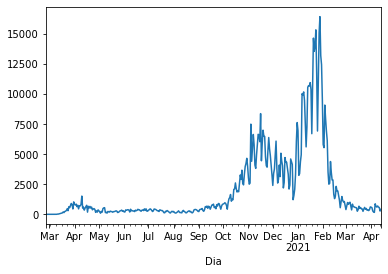

In [117]:
df_covid['confirmados_novos'].plot()

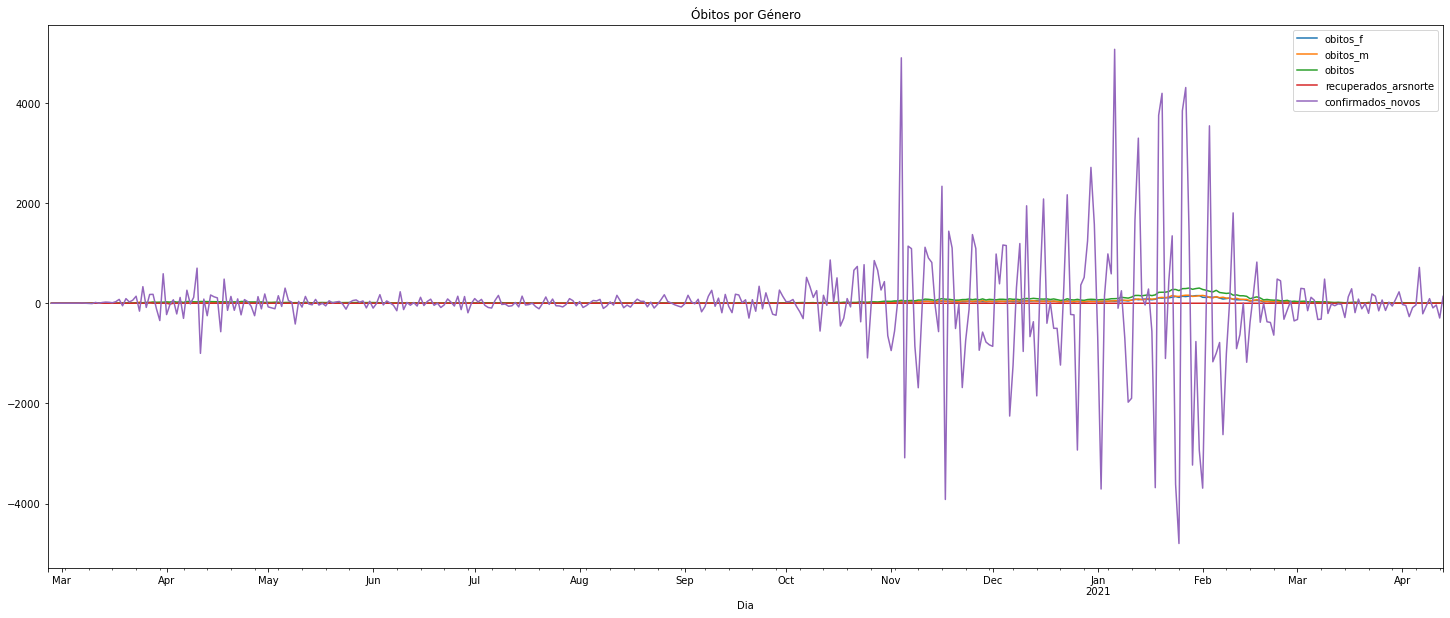

In [115]:
df_covid[deaths_gender_columns].diff().plot(title="Óbitos por Género", figsize=(25,10));

# * existe uma descontinuidade estranha nos obitos por género... validar se a sua soma é igual à dos óbitos

In [119]:
df_covid['soma_obitos_genero'] = df_covid['obitos_f'] + df_covid['obitos_m']

In [120]:
df_covid.loc[df_covid['soma_obitos_genero'] !=  df_covid['obitos']][['soma_obitos_genero', 'obitos']]

soma_obitos_genero  obitos
Dia                                   
2020-03-17                   0       1
2020-03-18                   0       1
2020-03-19                   0       3
2020-03-20                   0       6
2020-03-21                   0      12
2020-03-22                   0      14
2020-03-23                   0      23
2020-06-19                1526    1527

# * esta descontinuidade deve-se ao feriado de 5 de outubro

In [47]:
without_5_oct = [str(dia) for dia in df_covid.index]
without_5_oct.remove('2020-10-05 00:00:00')

In [123]:
deaths_gender_columns.append('soma_obitos_genero')

In [124]:
deaths_gender_columns

['obitos_f', 'obitos_m', 'obitos', 'soma_obitos_genero']

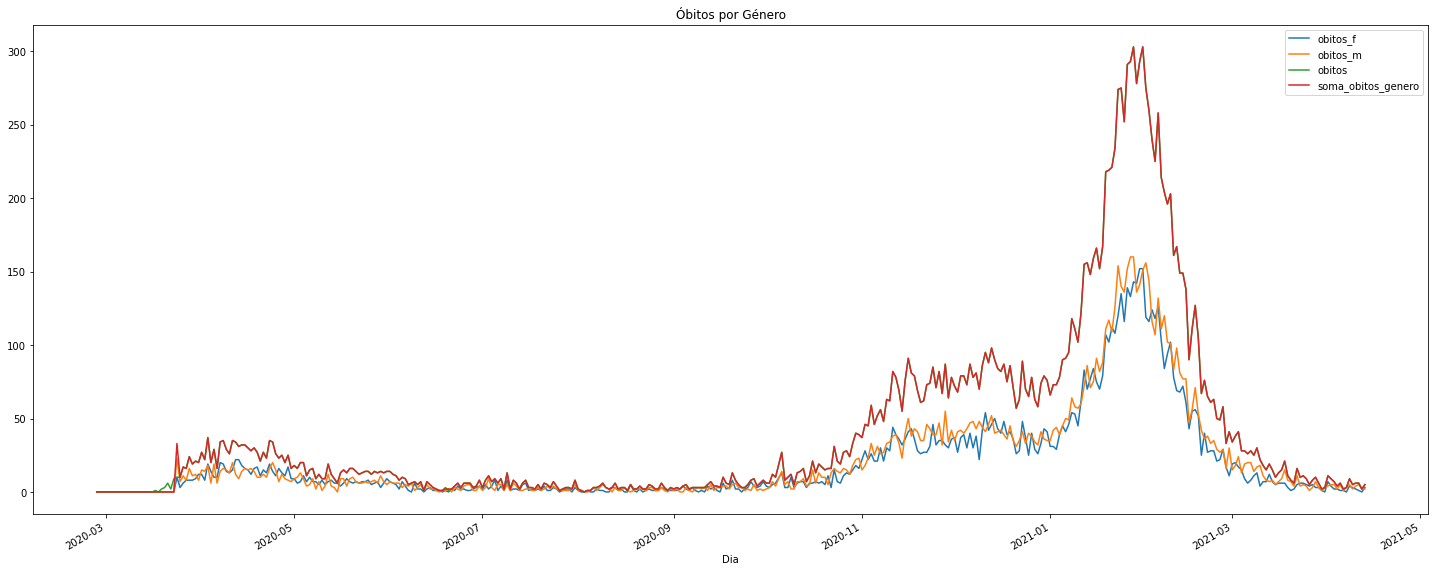

In [125]:
df_covid.loc[without_5_oct, deaths_gender_columns].diff().plot(title="Óbitos por Género", figsize=(25,10));

# * óbitos por região 

In [49]:
deaths_region_columns = []
for col in df_covid.columns:
    if 'obitos' in col and '0' not in col:
        deaths_region_columns.append(col)
        
cols_to_remove = ['obitos', 'obitos_f', 'obitos_m', 'soma_obitos', 'soma_obitos_genero']

for col in cols_to_remove:
    if col in deaths_region_columns:
        deaths_region_columns.remove(col)

In [50]:
deaths_region_columns

['obitos_arsnorte',
 'obitos_arscentro',
 'obitos_arslvt',
 'obitos_arsalentejo',
 'obitos_arsalgarve',
 'obitos_acores',
 'obitos_madeira',
 'obitos_estrangeiro']

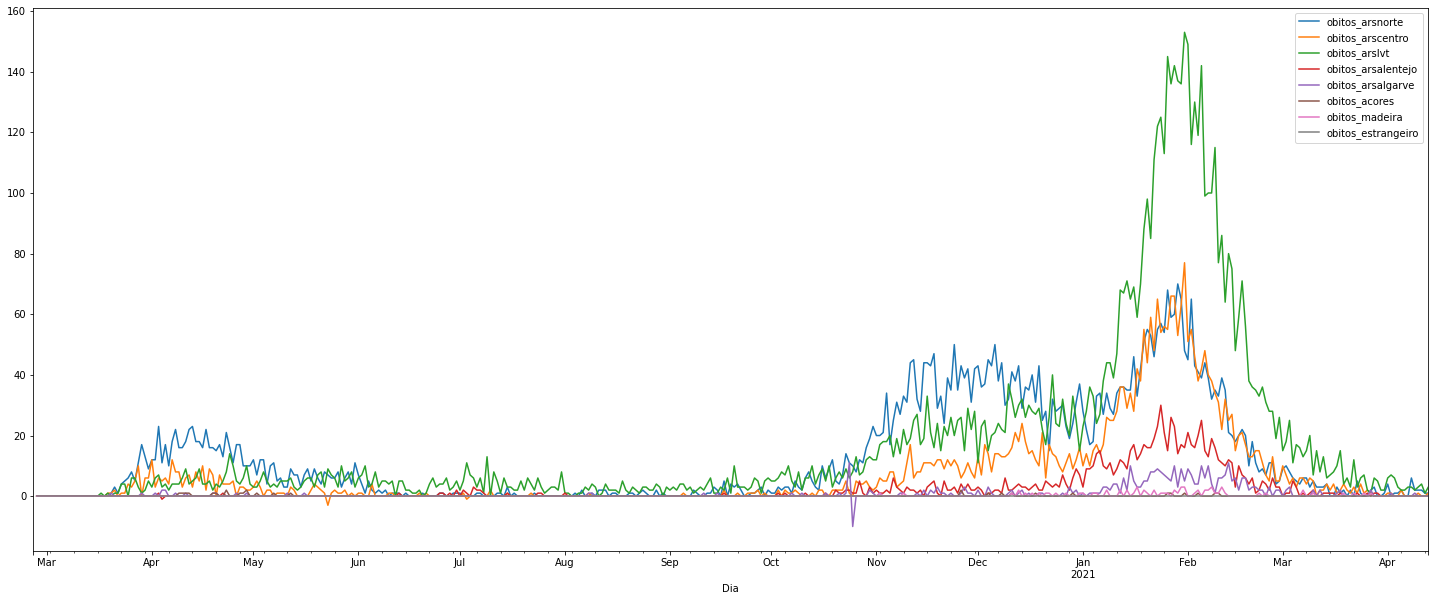

In [51]:
df_covid[deaths_region_columns].diff().plot(title="", figsize=(25,10));

In [52]:
np.sum(df_covid[deaths_region_columns].diff() < 0)

obitos_arsnorte       0
obitos_arscentro      2
obitos_arslvt         0
obitos_arsalentejo    1
obitos_arsalgarve     1
obitos_acores         0
obitos_madeira        0
obitos_estrangeiro    0
dtype: int64

In [53]:
 df_covid['soma_obitos_regiao'] = 0
for col in deaths_region_columns:
    df_covid['soma_obitos_regiao'] += df_covid[col]

In [54]:
 df_covid.loc[df_covid['soma_obitos_regiao'] !=  df_covid['obitos']][['soma_obitos_regiao', 'obitos']]

soma_obitos_regiao  obitos
Dia                                   
2020-10-24                2307    2297

# * sintomas (% de infetados desse dia que teve cada tipo de sintoma)

In [55]:
symptomns_columns = ['sintomas_tosse',
 'sintomas_febre',
 'sintomas_dificuldade_respiratoria',
 'sintomas_cefaleia',
 'sintomas_dores_musculares',
 'sintomas_fraqueza_generalizada']

In [56]:
#df_covid['soma_sintomas'] = 0
#for col in symptomns_columns:
 #   df_covid['soma_sintomas'] += df_covid[col]
#symptomns_columns.append('soma_sintomas')

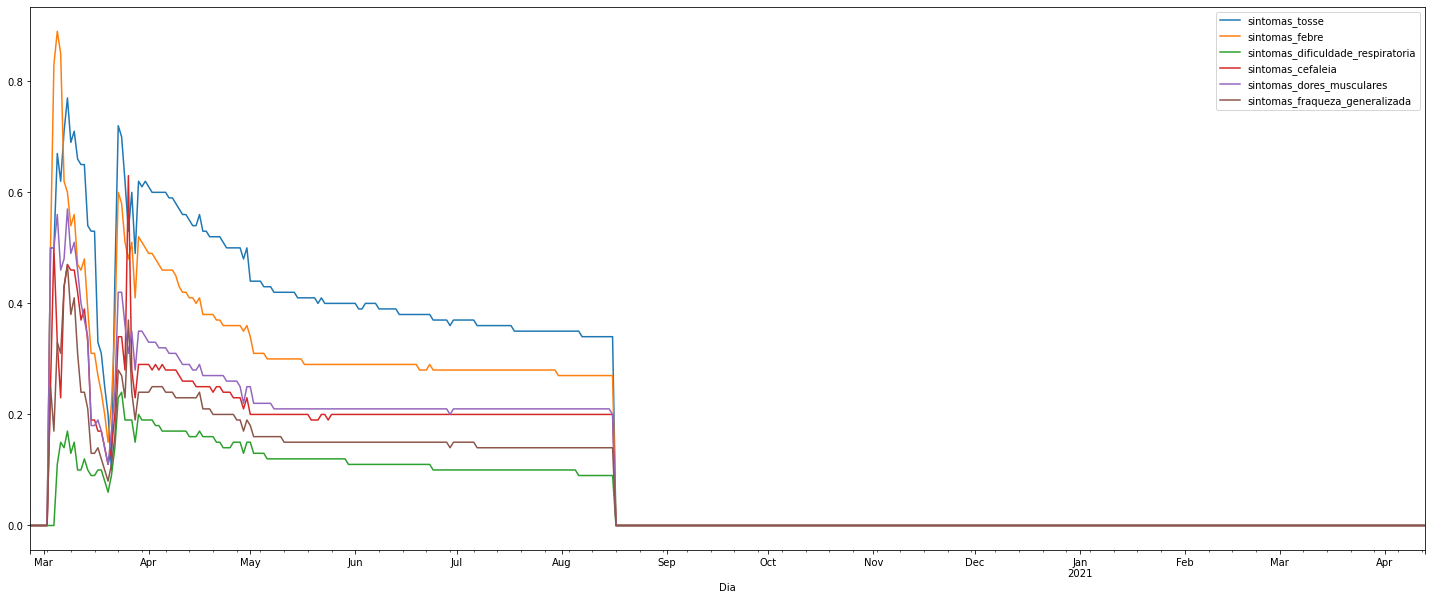

In [57]:
df_covid[symptomns_columns].plot(title="", figsize=(25,10));

# * Confirmados

In [58]:
confirmed_female_columns = ['confirmados_0_9_f',
 'confirmados_10_19_f',
 'confirmados_20_29_f',
 'confirmados_30_39_f',
 'confirmados_40_49_f',
 'confirmados_50_59_f',
 'confirmados_60_69_f',
 'confirmados_70_79_f',
 'confirmados_80_plus_f']

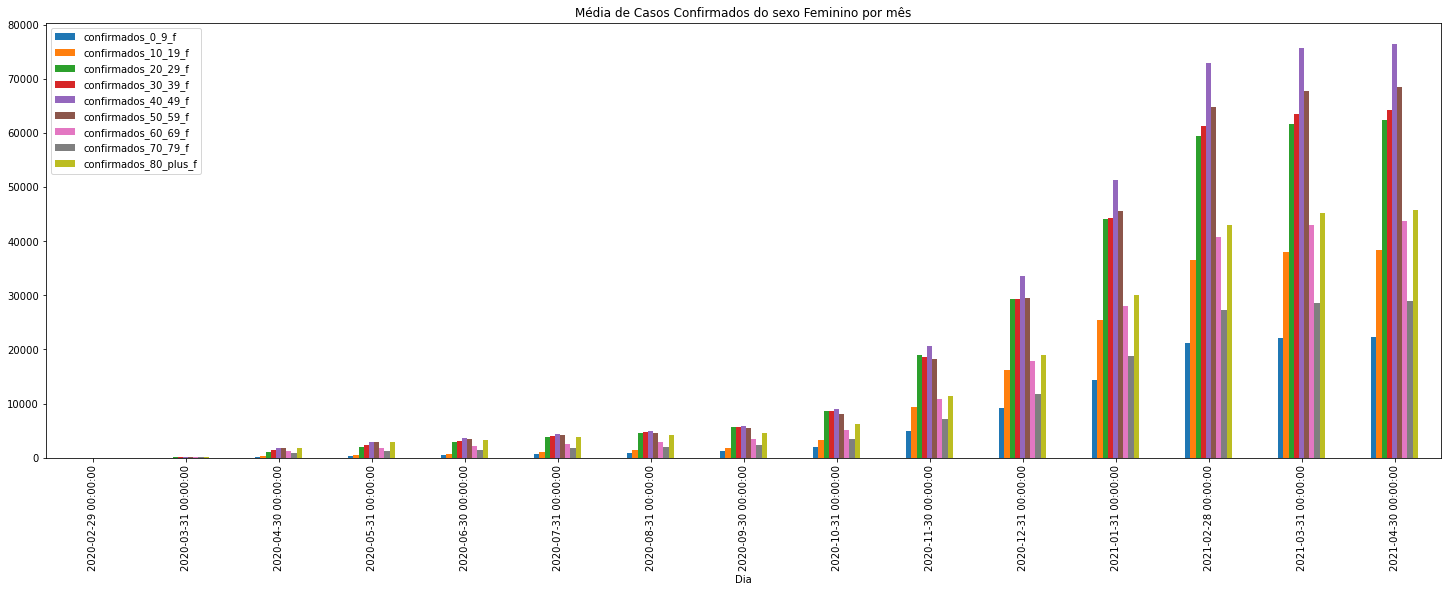

In [59]:
df_covid[confirmed_female_columns].resample("M").mean().plot(title="Média de Casos Confirmados do sexo Feminino por mês", kind='bar', figsize=(25,8));

In [60]:
from datetime import datetime

In [61]:
after_15_march = [str(dia) for dia in df_covid.index if dia > datetime.strptime('2021-03-15', '%Y-%m-%d')]

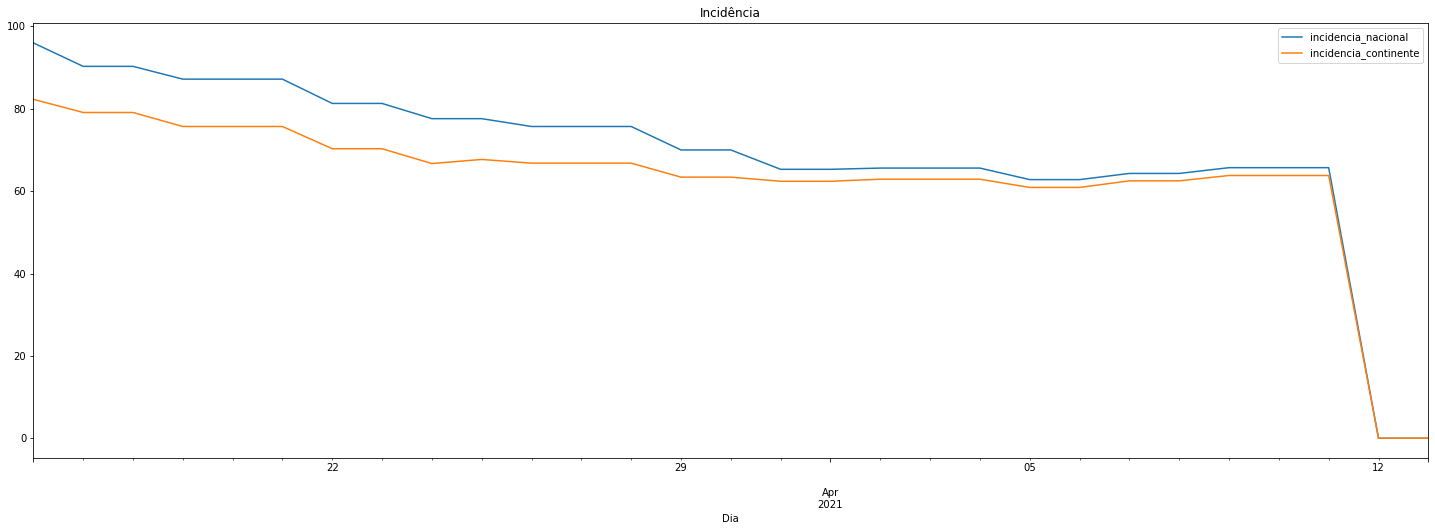

In [62]:
incidencia_columns = ['incidencia_nacional', 'incidencia_continente']
df_covid.loc[after_15_march, incidencia_columns].plot(title="Incidência", figsize=(25,8));

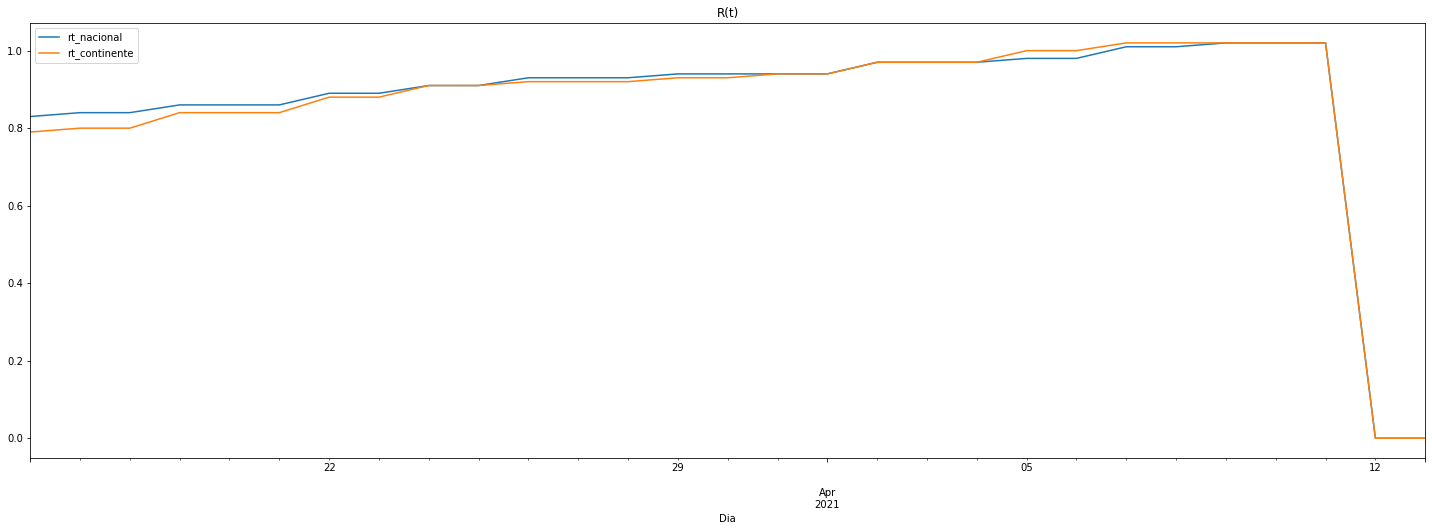

In [63]:
transmissao_columns = ['rt_nacional', 'rt_continente']
df_covid.loc[after_15_march, transmissao_columns].plot(title="R(t)", figsize=(25,8));

# B) Dataset "Consultas Médicas Hospitalares"

In [64]:
#!pip install odsclient[full]

In [65]:
datasetHospId = "01_sica_evolucao-mensal-das-consultas-medicas-hospitalares"

In [66]:
%matplotlib inline

In [67]:
df_hosp = get_whole_dataframe(datasetHospId, base_url="https://transparencia.sns.gov.pt/", tqdm=True)

https://transparencia.sns.gov.pt/explore/dataset/01_sica_evolucao-mensal-das-consultas-medicas-hospitalares/download/: 0.00B [00:01, ?B/s]


In [68]:
df_hosp.head()

Período Periodo_format_2                       Região  \
0  2018-11       2018/11/01        Região de Saúde Norte   
1  2018-12       2018/12/01  Região de Saúde do Alentejo   
2  2018-12       2018/12/01    Região de Saúde do Centro   
3  2018-12       2018/12/01    Região de Saúde do Centro   
4  2018-12       2018/12/01          Região de Saúde LVT   

                                         Instituição Localização Geográfica  \
0          Unidade Local de Saúde de Matosinhos, EPE  41.1794456,-8.6745115   
1    Unidade Local de Saúde do Norte Alentejano, EPE  39.3003425,-7.4263845   
2  Centro Hospitalar Universitário Cova da Beira,...  40.2804158,-7.4922407   
3         Hospital Distrital da Figueira da Foz, EPE   40.117897,-8.8586755   
4  Centro Hospitalar Universitário Lisboa Central...  38.7166948,-9.1371248   

   Nº Consultas Médicas Total  Nº Primeiras Consultas  \
0                      265575                   76981   
1                      100375                   28114   
2                      148747                   50090   
3                       91270                   32938   
4                      725004                  189989   

   Nº Consultas Subsequentes  
0                     188594  
1                      72261  
2                      98657  
3                      58332  
4                     535015

In [69]:
df_hosp.describe()

Nº Consultas Médicas Total  Nº Primeiras Consultas  \
count                 4826.000000             4826.000000   
mean                130211.812681            37136.986324   
std                 142105.993447            37861.673866   
min                    232.000000               95.000000   
25%                  36309.250000            10407.750000   
50%                  82348.000000            24976.000000   
75%                 172558.000000            50680.500000   
max                 912095.000000           227493.000000   

       Nº Consultas Subsequentes  
count                4826.000000  
mean                93074.826357  
std                105112.625609  
min                   137.000000  
25%                 25367.000000  
50%                 57082.000000  
75%                121851.750000  
max                698196.000000

In [70]:
len(df_hosp)/len(df_hosp['Período'].unique())

49.244897959183675

In [71]:
print(f" Dataset com {len(df_hosp['Região'].unique())} Regiões distintas:\n")
count = 1
for reg in df_hosp['Região'].unique():
    print(f"\t{count}º Região '{reg}'")
    count+=1

 Dataset com 5 Regiões distintas:

	1º Região 'Região de Saúde Norte'
	2º Região 'Região de Saúde do Alentejo'
	3º Região 'Região de Saúde do Centro'
	4º Região 'Região de Saúde LVT'
	5º Região 'Região de Saúde do Algarve'


In [72]:
print(f" Dataset com {len(df_hosp['Instituição'].unique())} Instituições distintas...")

 Dataset com 52 Instituições distintas...


# * número de instituições por região

In [73]:
df_hosp[['Região', 'Instituição']].groupby('Região').nunique()

Instituição
Região                                  
Região de Saúde LVT                   16
Região de Saúde Norte                 18
Região de Saúde do Alentejo            4
Região de Saúde do Algarve             1
Região de Saúde do Centro             13

In [129]:
df_hosp.loc[df_hosp['Região'] == 'Região de Saúde do Algarve', 'Instituição'].unique()

array(['Centro Hospitalar Universitário do Algarve,EPE'], dtype=object)

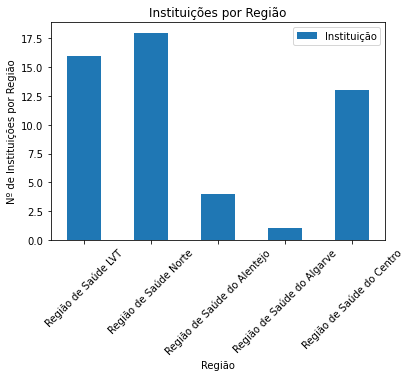

In [130]:
xlabels = df_hosp[['Região', 'Instituição']].groupby('Região').nunique().index
ax = df_hosp[['Região', 'Instituição']].groupby('Região').nunique().plot(kind='bar')
ax.set_xticklabels(xlabels, rotation=45);
ax.set_ylabel('Nº de Instituições por Região');
ax.set_title('Instituições por Região');

In [75]:
df_hosp['Período'] = pd.to_datetime(df_hosp['Período'] , format='%Y-%m')   # mês
df_hosp['Periodo_format_2'] = pd.to_datetime(df_hosp['Periodo_format_2'] , format='%Y/%m/%d')   # dia
df_hosp.rename(columns = {'Periodo_format_2':'Dia'}, inplace=True)

In [76]:
df_hosp.loc[df_hosp['Período']!=df_hosp['Dia']]

Empty DataFrame
Columns: [Período, Dia, Região, Instituição, Localização Geográfica, Nº Consultas Médicas Total, Nº Primeiras Consultas, Nº Consultas Subsequentes]
Index: []

In [77]:
print(f" Dataset com dados de {df_hosp['Dia'].min()} a {df_hosp['Dia'].max()} ...")

 Dataset com dados de 2013-01-01 00:00:00 a 2021-02-01 00:00:00 ...


In [78]:
# heat map - consultas por região e por "Ano-mês"
df_hosp.groupby(['Região', 'Dia']).sum()

Nº Consultas Médicas Total  \
Região                    Dia                                      
Região de Saúde LVT       2013-01-01                      383984   
                          2013-02-01                      725954   
                          2013-03-01                     1062755   
                          2013-04-01                     1433688   
                          2013-05-01                     1828824   
...                                                          ...   
Região de Saúde do Centro 2020-10-01                     1669587   
                          2020-11-01                     1865984   
                          2020-12-01                     2018747   
                          2021-01-01                      171791   
                          2021-02-01                      333257   

                                      Nº Primeiras Consultas  \
Região                    Dia                                  
Região de Saúde LVT       2013-01-01                  107282   
                          2013-02-01                  206746   
                          2013-03-01                  301862   
                          2013-04-01                  405973   
                          2013-05-01                  517978   
...                                                      ...   
Região de Saúde do Centro 2020-10-01                  441721   
                          2020-11-01                  496523   
                          2020-12-01                  539989   
                          2021-01-01                   45395   
                          2021-02-01                   88228   

                                      Nº Consultas Subsequentes  
Região                    Dia                                    
Região de Saúde LVT       2013-01-01                     276702  
                          2013-02-01                     519208  
                          2013-03-01                     760893  
                          2013-04-01                    1027715  
                          2013-05-01                    1310846  
...                                                         ...  
Região de Saúde do Centro 2020-10-01                    1227866  
                          2020-11-01                    1369461  
                          2020-12-01                    1478758  
                          2021-01-01                     126396  
                          2021-02-01                     245029  

[490 rows x 3 columns]

In [79]:
# numero de registos por região
(490/5)

98.0

In [80]:
df_hosp.groupby('Região').count()

Período   Dia  Instituição  \
Região                                                    
Região de Saúde LVT             1568  1568         1568   
Região de Saúde Norte           1568  1568         1568   
Região de Saúde do Alentejo      392   392          392   
Região de Saúde do Algarve        98    98           98   
Região de Saúde do Centro       1200  1200         1200   

                             Localização Geográfica  \
Região                                                
Região de Saúde LVT                            1568   
Região de Saúde Norte                          1568   
Região de Saúde do Alentejo                     392   
Região de Saúde do Algarve                       98   
Região de Saúde do Centro                      1200   

                             Nº Consultas Médicas Total  \
Região                                                    
Região de Saúde LVT                                1568   
Região de Saúde Norte                              1568   
Região de Saúde do Alentejo                         392   
Região de Saúde do Algarve                           98   
Região de Saúde do Centro                          1200   

                             Nº Primeiras Consultas  Nº Consultas Subsequentes  
Região                                                                          
Região de Saúde LVT                            1568                       1568  
Região de Saúde Norte                          1568                       1568  
Região de Saúde do Alentejo                     392                        392  
Região de Saúde do Algarve                       98                         98  
Região de Saúde do Centro                      1200                       1200

In [81]:
# heat map - consultas por região e por "Ano-mês", cruzar com os casos de covid confirmados !!! (apenas para os meses em que ha dados em comum....)

In [82]:
# que insituticoes têm mais consultas médicas realizadas? que região? essas regioes são as que registam menos casos confirmados?
# (cruzar os dois datasets)

# * validar se o número de consultas totais é a soma das "primeiras consultas" com as "consultas subsequentes"

In [131]:
len(df_hosp.loc[df_hosp['Nº Consultas Médicas Total'] != (df_hosp['Nº Primeiras Consultas'] + df_hosp['Nº Consultas Subsequentes'])])

0

In [84]:
pivot_appointments = pd.pivot_table(df_hosp, values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

In [85]:
pivot_first_appointment = pd.pivot_table(df_hosp, values = 'Nº Primeiras Consultas', index = ['Região'], columns = ['Dia'])

In [86]:
pivot_subseq_appointment = pd.pivot_table(df_hosp, values = 'Nº Consultas Subsequentes', index = ['Região'], columns = ['Dia'])

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2 heatmaps - um antes da pandemia começar e outro depois:

In [88]:
covid_start_date = '2020-01-01'

In [89]:
# before covid
df_hosp.loc[df_hosp['Dia']<covid_start_date]['Dia'].max(), len(df_hosp.loc[df_hosp['Dia']<covid_start_date])

(Timestamp('2019-12-01 00:00:00'), 4140)

In [90]:
before_covid_days = df_hosp.loc[df_hosp['Dia']<covid_start_date].index
after_covid_days = df_hosp.loc[df_hosp['Dia']>=covid_start_date].index

In [91]:
df_hosp.loc[before_covid_days]['Dia'].max(), df_hosp.loc[after_covid_days]['Dia'].min()

(Timestamp('2019-12-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [92]:
# after covid started
df_hosp.loc[df_hosp['Dia']>=covid_start_date]['Dia'].max(), len(df_hosp.loc[df_hosp['Dia']>=covid_start_date])

(Timestamp('2021-02-01 00:00:00'), 686)

In [93]:
pivot_appointments_bf = pd.pivot_table(df_hosp.loc[before_covid_days], values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

In [94]:
pivot_appointments_bf.index

Index(['Região de Saúde LVT', 'Região de Saúde Norte',
       'Região de Saúde do Alentejo', 'Região de Saúde do Algarve',
       'Região de Saúde do Centro'],
      dtype='object', name='Região')

In [95]:
monthDict = {'1':'Jan',
'2':'Feb',
'3':'Mar',
'4':'Apr',
'5':'May',
'6':'Jun',
'7':'Jul',
'8':'Aug',
'9':'Sept',
'10':'Oct',
'11':'Nov',
'12':'Dec'}

In [96]:
len(xlabels), len(pivot_appointments_bf.columns)

(5, 84)

In [97]:
def getMonthLabels(pivot, monthDict):
    xlabels = []
    for month in pivot.columns:
        if month.month % 2 == 0:
            #print(f" Mês {month.month} de {month.year} - {month} . ")
            xlabels.append('{}-{}'.format(monthDict[str(month.month)], month.year))
        else:
            xlabels.append('') 
    return xlabels

In [132]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap = 'tab20c'
#cmap = 'gist_ncar'

# usar outro COLOR MAP!!

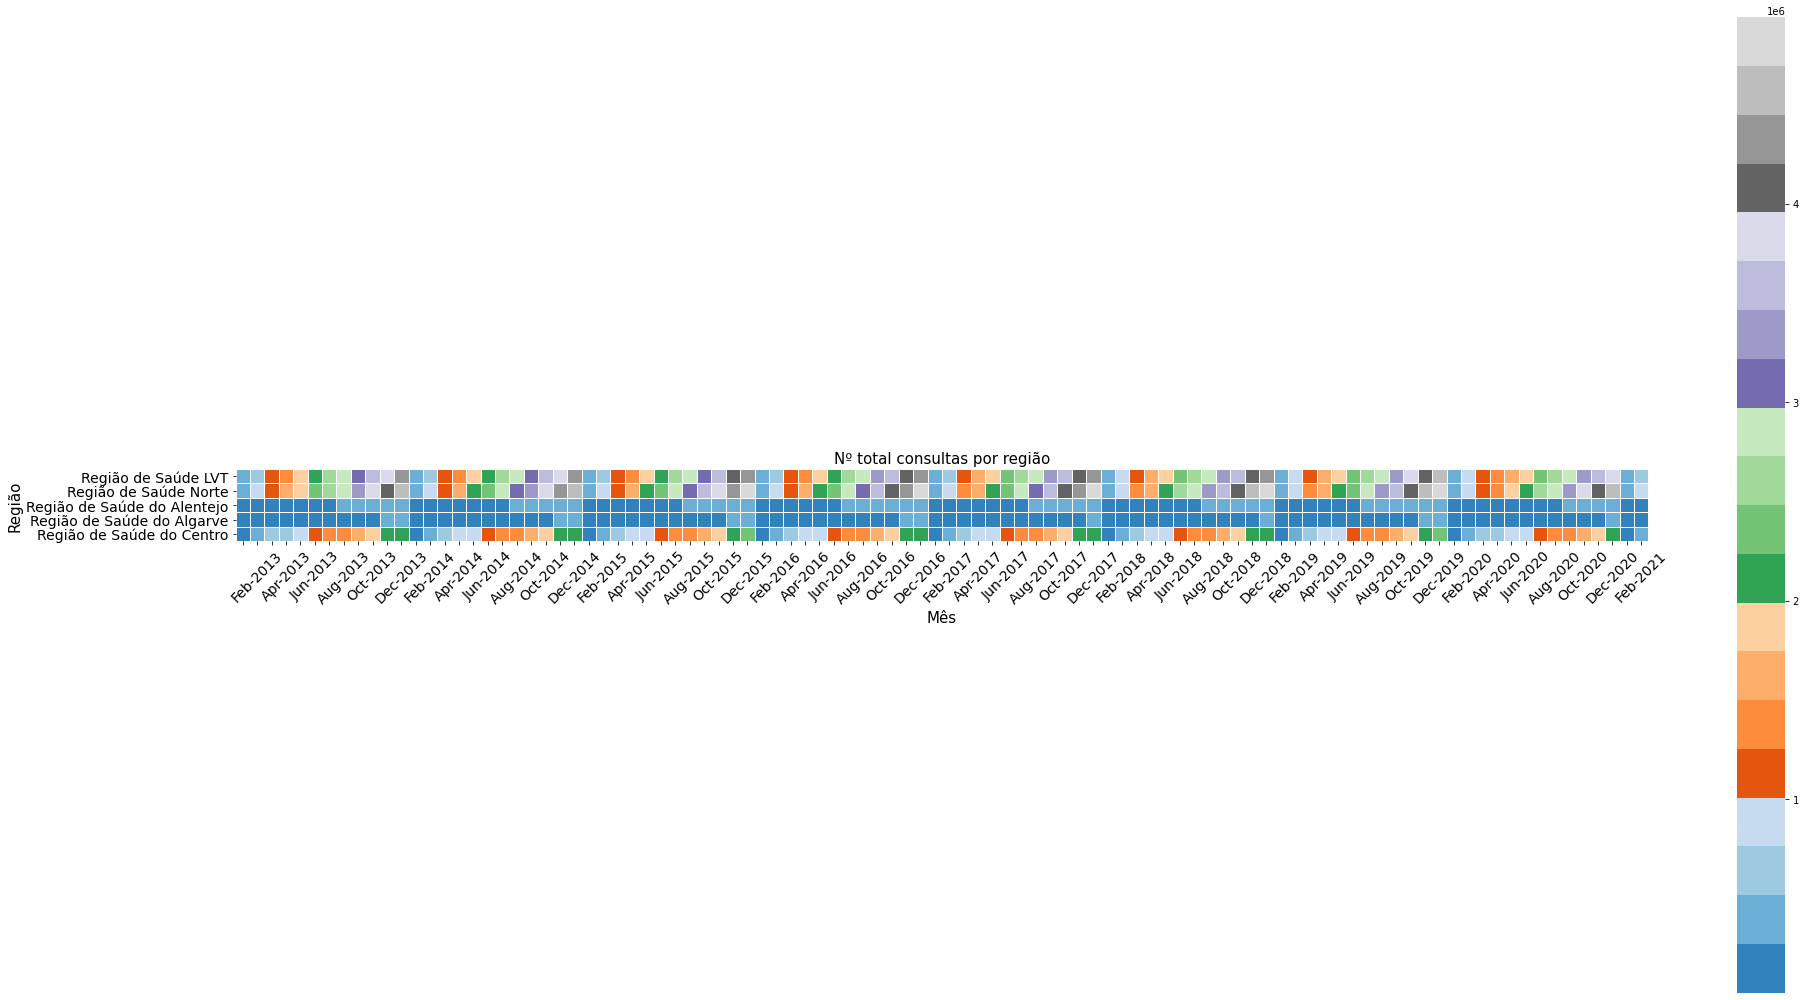

In [133]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments, monthDict)
ax = sns.heatmap(pivot_appointments, square=True, annot=False, cmap = cmap, annot_kws={"size": 18}, linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região", fontsize=15);
plt.tight_layout()

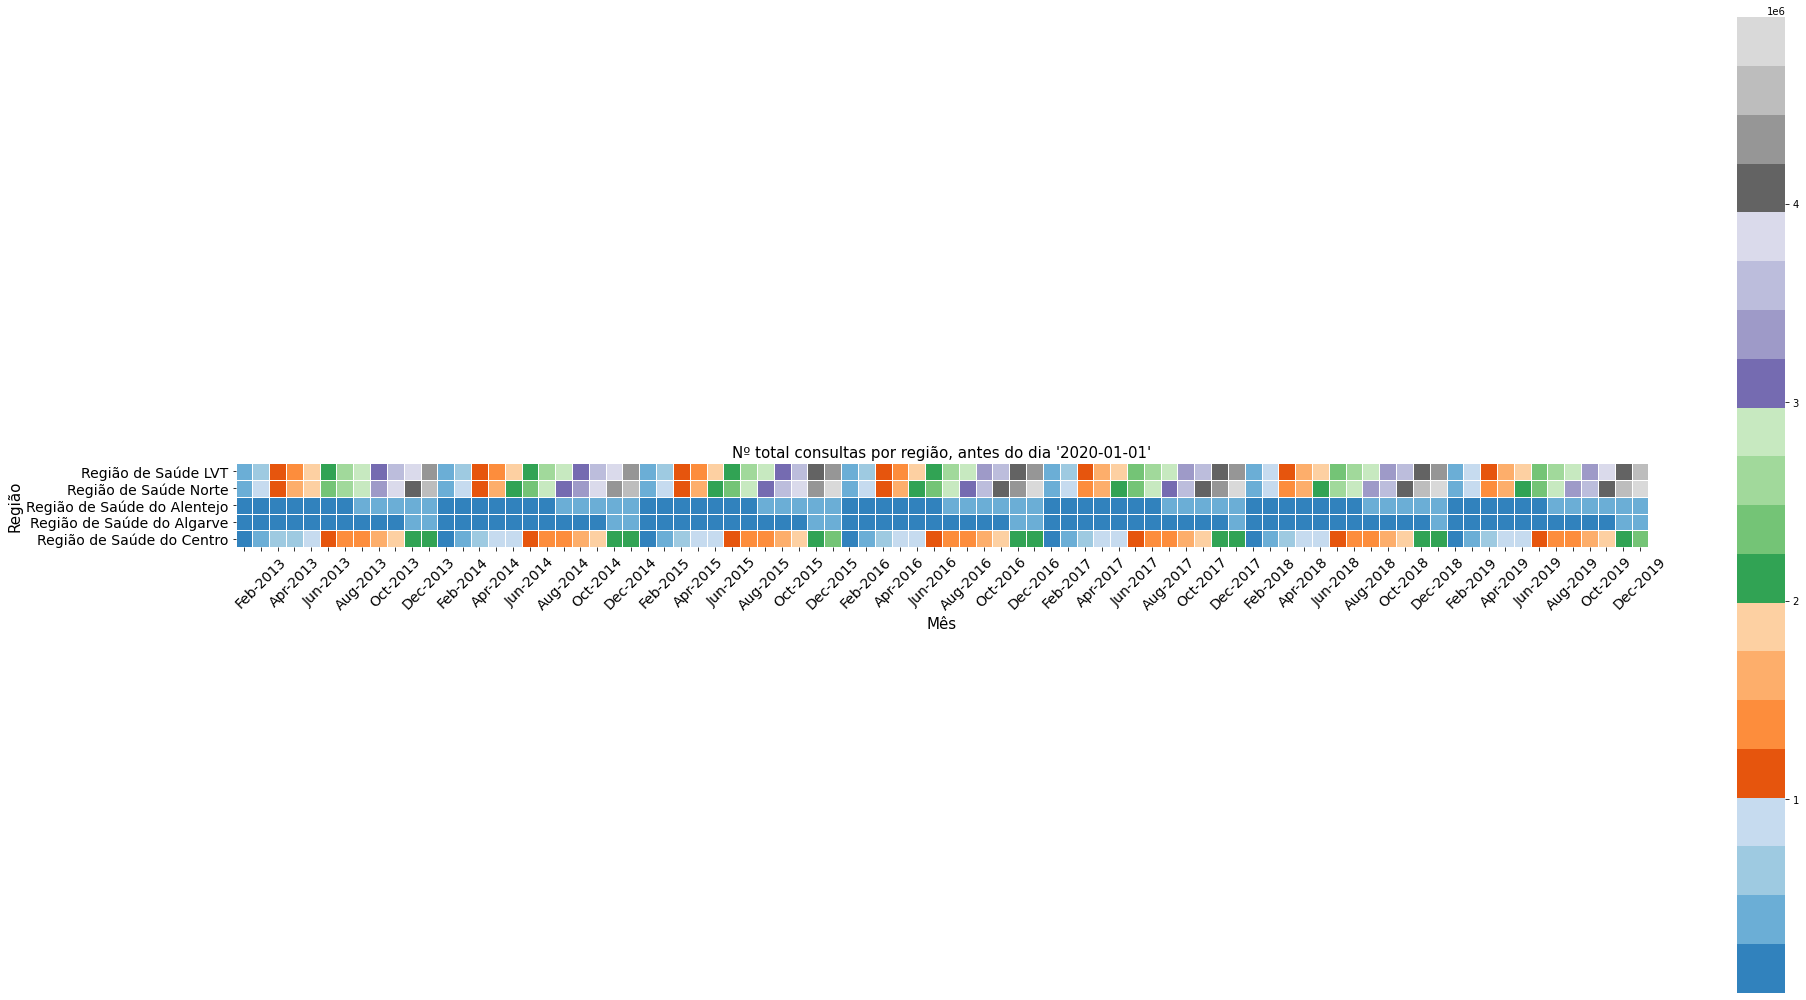

In [134]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments_bf, monthDict)
ax = sns.heatmap(pivot_appointments_bf, square=True, annot=False, cmap = cmap, annot_kws={"size": 18}, linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments_bf.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região, antes do dia '{}'".format(covid_start_date), fontsize=15);
plt.tight_layout()

In [101]:
pivot_appointments_af = pd.pivot_table(df_hosp.loc[after_covid_days], values = 'Nº Consultas Médicas Total', index = ['Região'], columns = ['Dia'], aggfunc='sum')

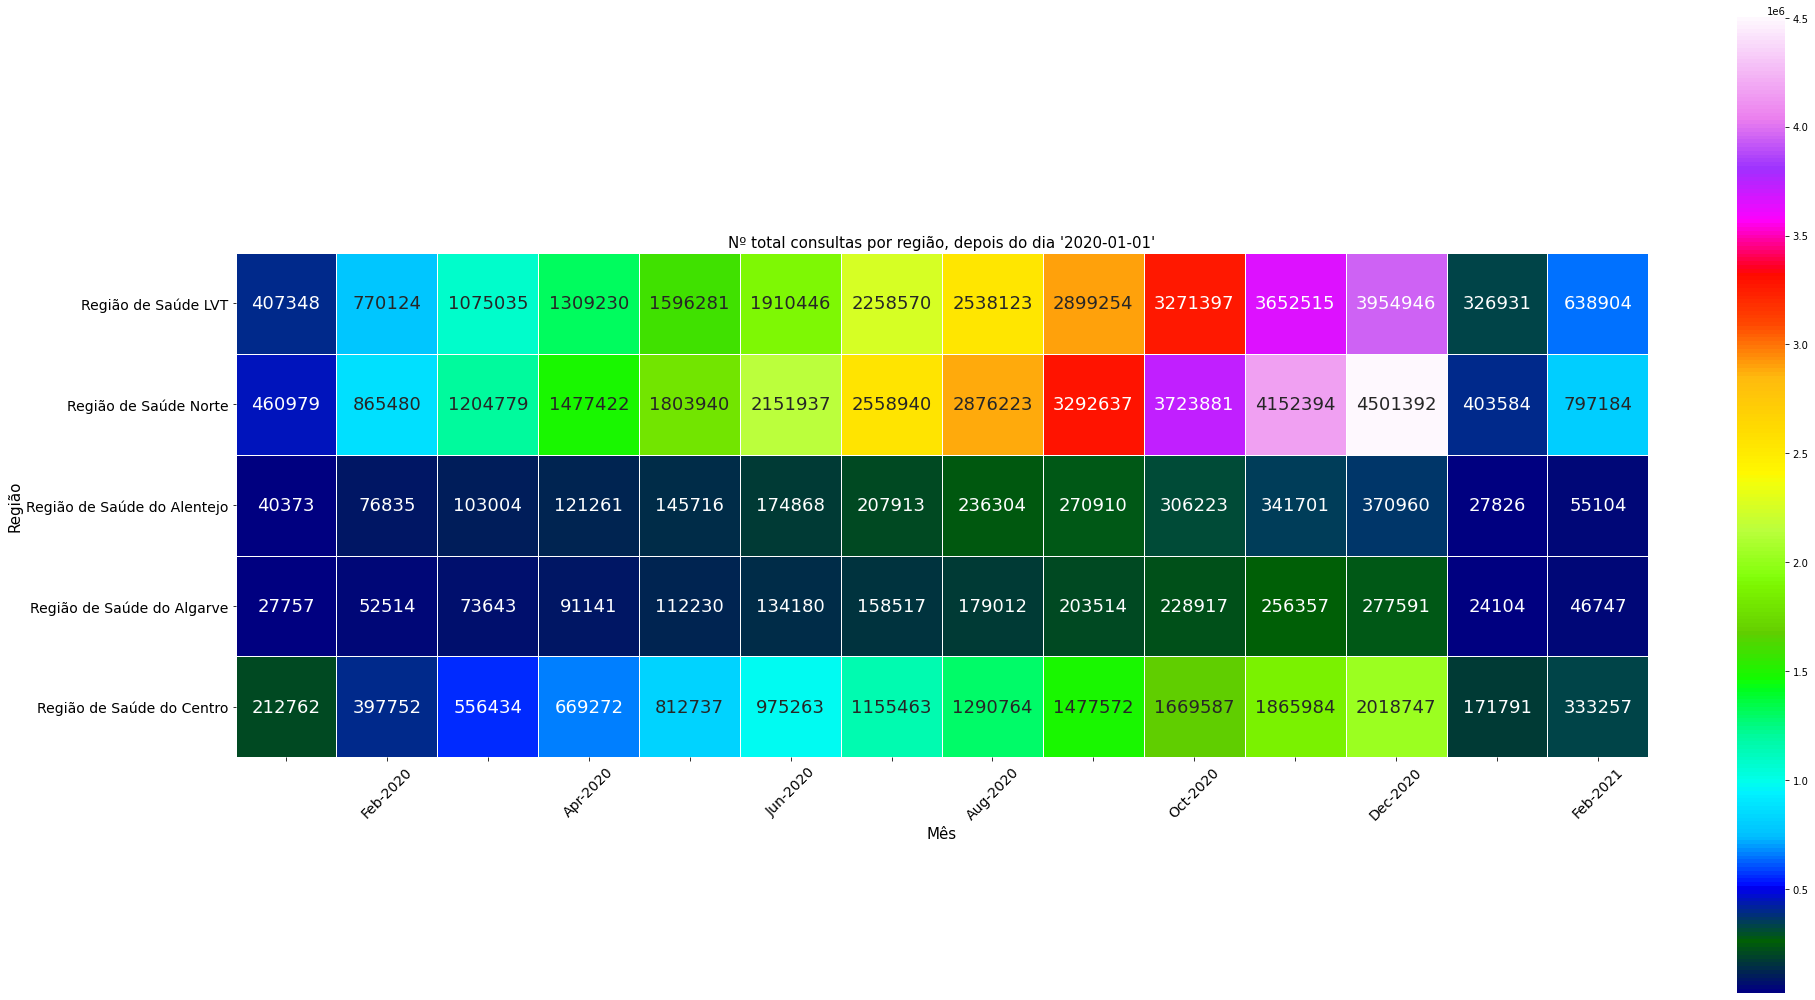

In [102]:
fig, ax = plt.subplots(figsize=(28,14))
xlabels = getMonthLabels(pivot_appointments_af, monthDict)
#cmap = 'gist_ncar'
ax = sns.heatmap(pivot_appointments_af, square=True, annot=True, cmap = cmap, annot_kws={"size": 18}, fmt='d', linewidths=.5) #'gist_ncar')
ax.set_yticklabels(pivot_appointments_af.index,rotation=0, fontsize = 14);
ax.set_xticklabels(xlabels,rotation=45, fontsize = 14);
ax.set_xlabel('Mês', fontsize=15)
ax.set_ylabel('Região', fontsize=15)
ax.set_title("Nº total consultas por região, depois do dia '{}'".format(covid_start_date), fontsize=15);
plt.tight_layout()

# média de consultas por região, antes e depois da pandemia começar

In [135]:
df_hosp_new_index = df_hosp.sort_values(by='Dia').set_index('Dia')
df_hosp_new_index = df_hosp_new_index.drop('Período', axis=1)

In [136]:
df_hosp_new_index['Ano'] = df_hosp_new_index.index.year

In [137]:
df_hosp_new_index.head()

Região  \
Dia                                 
2013-01-01  Região de Saúde Norte   
2013-01-01    Região de Saúde LVT   
2013-01-01    Região de Saúde LVT   
2013-01-01    Região de Saúde LVT   
2013-01-01  Região de Saúde Norte   

                                                  Instituição  \
Dia                                                             
2013-01-01                             Hospital de Braga, PPP   
2013-01-01  Centro Hospitalar Universitário de Lisboa Nort...   
2013-01-01                  Centro Hospitalar Médio Tejo, EPE   
2013-01-01                           Hospital de Cascais, PPP   
2013-01-01   Centro Hospitalar Universitário de São João, EPE   

           Localização Geográfica  Nº Consultas Médicas Total  \
Dia                                                             
2013-01-01     41.56785,-8.398982                       32909   
2013-01-01  38.7500861,-9.1616116                       66044   
2013-01-01   39.478072,-8.5404429                       15379   
2013-01-01    38.729006,-9.418267                       12634   
2013-01-01  41.1831056,-8.6010558                       64514   

            Nº Primeiras Consultas  Nº Consultas Subsequentes   Ano  
Dia                                                                  
2013-01-01                   10502                      22407  2013  
2013-01-01                   18081                      47963  2013  
2013-01-01                    5869                       9510  2013  
2013-01-01                    4752                       7882  2013  
2013-01-01                   16107                      48407  2013

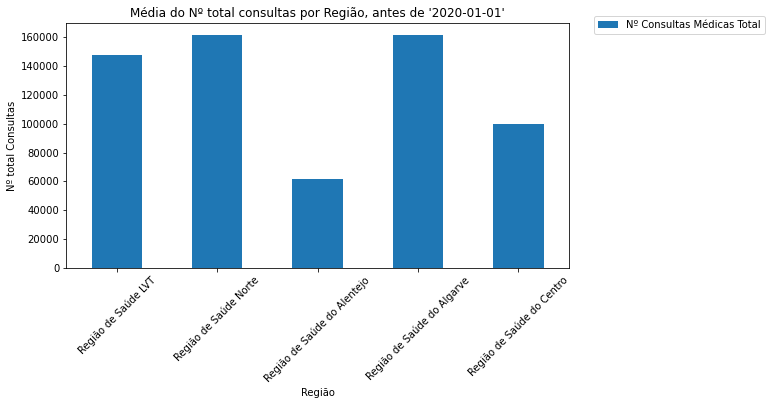

In [138]:
xlabels = df_hosp_new_index.loc[df_hosp_new_index.index < covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().index
ax = df_hosp_new_index.loc[df_hosp_new_index.index < covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().plot(kind='bar', figsize=(6*1.5,3*1.5));
ax.set_xticklabels(xlabels, rotation=45);
ax.legend(bbox_to_anchor=(1.4, 1.05))
ax.set_ylabel('Nº total Consultas');
ax.set_title("Média do Nº total consultas por Região, antes de '{}'".format(covid_start_date));

In [139]:
df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean()

Nº Consultas Médicas Total
Região                                                 
Região de Saúde LVT                       118790.642857
Região de Saúde Norte                     135137.375000
Região de Saúde do Alentejo                44267.821429
Região de Saúde do Algarve                133301.714286
Região de Saúde do Centro                  80996.339286

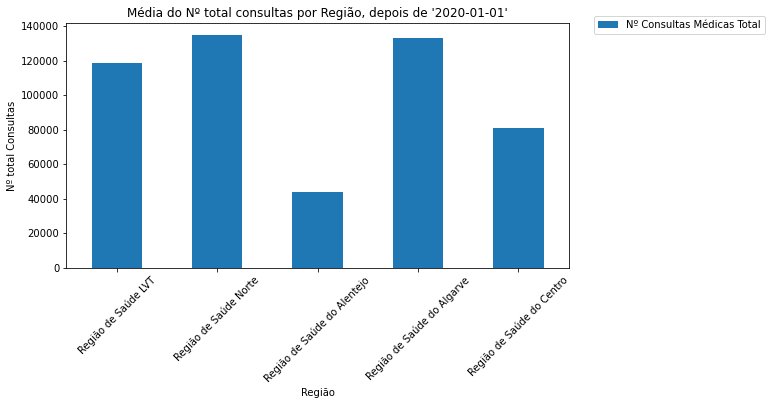

In [140]:
xlabels = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().index
ax = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().plot(kind='bar', figsize=(6*1.5,3*1.5));
ax.set_xticklabels(xlabels, rotation=45);
ax.legend(bbox_to_anchor=(1.4, 1.05))
ax.set_ylabel('Nº total Consultas');
ax.set_title("Média do Nº total consultas por Região, depois de '{}'".format(covid_start_date));

In [128]:
groupby = df_hosp_new_index.groupby(['Região', 'Ano']).mean()
#groupby

In [129]:
groupby.loc[(groupby.index.isin([2013], level=1)) & (groupby.index.isin(['Região de Saúde LVT'], level=0)) ]

Nº Consultas Médicas Total  Nº Primeiras Consultas  \
Região              Ano                                                        
Região de Saúde LVT 2013               143374.854167            40378.255208   

                          Nº Consultas Subsequentes  
Região              Ano                              
Região de Saúde LVT 2013              102996.598958

In [132]:
# total por ano e região
#groupby.groupby(['Ano', 'Região']).sum().filter(like='2013')

In [133]:
df_hosp_new_index

Região  \
Dia                                      
2013-01-01       Região de Saúde Norte   
2013-01-01         Região de Saúde LVT   
2013-01-01         Região de Saúde LVT   
2013-01-01         Região de Saúde LVT   
2013-01-01       Região de Saúde Norte   
...                                ...   
2021-02-01       Região de Saúde Norte   
2021-02-01  Região de Saúde do Algarve   
2021-02-01   Região de Saúde do Centro   
2021-02-01         Região de Saúde LVT   
2021-02-01         Região de Saúde LVT   

                                                  Instituição  \
Dia                                                             
2013-01-01                             Hospital de Braga, PPP   
2013-01-01  Centro Hospitalar Universitário de Lisboa Nort...   
2013-01-01                  Centro Hospitalar Médio Tejo, EPE   
2013-01-01                           Hospital de Cascais, PPP   
2013-01-01   Centro Hospitalar Universitário de São João, EPE   
...                                                       ...   
2021-02-01        Instituto Português Oncologia do Porto, EPE   
2021-02-01     Centro Hospitalar Universitário do Algarve,EPE   
2021-02-01                   Centro Hospitalar de Leiria, EPE   
2021-02-01                           Hospital de Cascais, PPP   
2021-02-01                    Centro Hospitalar do Oeste, EPE   

           Localização Geográfica  Nº Consultas Médicas Total  \
Dia                                                             
2013-01-01     41.56785,-8.398982                       32909   
2013-01-01  38.7500861,-9.1616116                       66044   
2013-01-01   39.478072,-8.5404429                       15379   
2013-01-01    38.729006,-9.418267                       12634   
2013-01-01  41.1831056,-8.6010558                       64514   
...                           ...                         ...   
2021-02-01  41.1785642,-8.6062881                       52258   
2021-02-01  37.0238973,-7.9281554                       46747   
2021-02-01  39.7414812,-8.7982706                       46916   
2021-02-01    38.729006,-9.418267                       28693   
2021-02-01  39.4054629,-9.1258493                       21874   

            Nº Primeiras Consultas  Nº Consultas Subsequentes   Ano  
Dia                                                                  
2013-01-01                   10502                      22407  2013  
2013-01-01                   18081                      47963  2013  
2013-01-01                    5869                       9510  2013  
2013-01-01                    4752                       7882  2013  
2013-01-01                   16107                      48407  2013  
...                            ...                        ...   ...  
2021-02-01                   15963                      36295  2021  
2021-02-01                   11633                      35114  2021  
2021-02-01                   14679                      32237  2021  
2021-02-01                    8690                      20003  2021  
2021-02-01                    6682                      15192  2021  

[4826 rows x 7 columns]

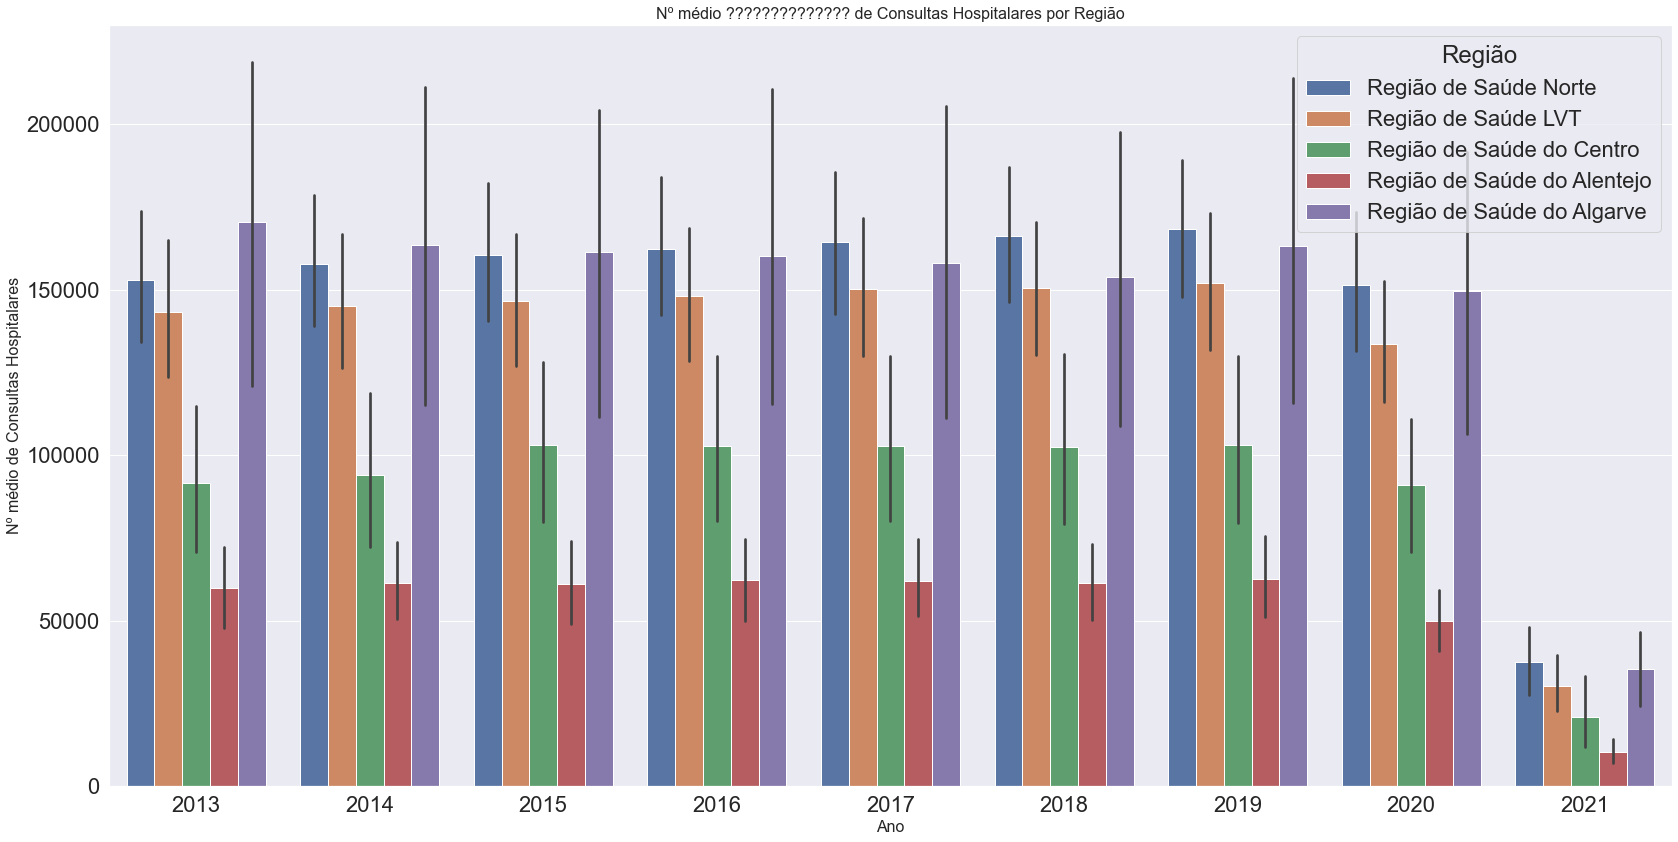

In [232]:
fontsize = 16
fig, ax = plt.subplots(figsize=(28,14))
ax = sns.barplot(x = 'Ano', y = 'Nº Consultas Médicas Total', hue='Região', data=df_hosp_new_index);
ax.set_xlabel('Ano', fontsize=fontsize);
ax.set_ylabel('Nº médio de Consultas Hospitalares', fontsize=fontsize);
ax.set_title("Nº médio ?????????????? de Consultas Hospitalares por Região", fontsize=fontsize);
#sns.set(font_scale = 2)
#for i, p in enumerate(ax.patches):
 #   height = p.get_height()
    #print(f" h {height}, i {i}, p {p} {p.get_x() + .05}")
  #  ax.text(p.get_x(), 1.05*height, str(round(height,1)))
    # apresentar % de consultas naquele ano, para cada região (barra)

# TO DO:

# - top 5 de instituições por região que MAIS consultas fazem, por Ano

# - top 5 de instituições por região que MENOS consultas fazem, por Ano

# - existe alguma relação entre as regiões com mais consultas e as regiões menos afetadas pelo covid? (cruzando c o dataset df_covid)

    * região do algarve (1 instituição) faz tantas consultas como região norte (18 instituições) (!!!!) e tem menos casos confirmados

# obter as 5 instituições de cada região que mais consultas fizeram, em cada ano

In [135]:
df_hosp_best_institutions = df_hosp_new_index.groupby(['Ano','Região', 'Instituição']).mean().sort_values(by=['Ano', 'Nº Consultas Médicas Total'], ascending=False)
df_hosp_best_institutions

Nº Consultas Médicas Total  \
Ano  Região                    Instituição                                                                      
2021 Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE                  98349.000000   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE                 94361.000000   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                     86654.000000   
     Região de Saúde LVT       Centro Hospitalar Universitário Lisboa Central,...                77887.000000   
                               Centro Hospitalar Universitário de Lisboa Norte...                76849.000000   
...                                                                                                       ...   
2013 Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                  26911.000000   
     Região de Saúde do Centro Hospital Dr. Francisco Zagalo                                     16399.333333   
                               Hospital Arcebispo João Crisóstomo                                 8420.916667   
                               Hospital José Luciano de Castro                                    7303.583333   
                               Centro Medicina de Reabilitação da Região Centr...                 2100.000000   

                                                                                   Nº Primeiras Consultas  \
Ano  Região                    Instituição                                                                  
2021 Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE              28496.500000   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE             21079.500000   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                 19005.500000   
     Região de Saúde LVT       Centro Hospitalar Universitário Lisboa Central,...            19559.500000   
                               Centro Hospitalar Universitário de Lisboa Norte...            19526.000000   
...                                                                                                   ...   
2013 Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                               2304.916667   
     Região de Saúde do Centro Hospital Dr. Francisco Zagalo                                  5290.583333   
                               Hospital Arcebispo João Crisóstomo                             4415.083333   
                               Hospital José Luciano de Castro                                2838.666667   
                               Centro Medicina de Reabilitação da Região Centr...              871.416667   

                                                                                   Nº Consultas Subsequentes  
Ano  Região                    Instituição                                                                    
2021 Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE                 69852.500000  
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE                73281.500000  
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                    67648.500000  
     Região de Saúde LVT       Centro Hospitalar Universitário Lisboa Central,...               58327.500000  
                               Centro Hospitalar Universitário de Lisboa Norte...               57323.000000  
...                                                                                                      ...  
2013 Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                 24606.083333  
     Região de Saúde do Centro Hospital Dr. Francisco Zagalo                                    11108.750000  
                               Hospital Arcebispo João Crisóstomo                    

In [136]:
def getTopAppointments(df):  
    
    topConsultas = pd.DataFrame(columns =  ['Ano', 'Região', 'Instituição', 'Nº Consultas Médicas Total'])
    year_arr = list(df.index.levels[0])
    region_arr = list(df.index.levels[1])

    rows = 0
    for year in year_arr:
        #print(f"--------------- ANO {year} ---------------")
        for reg in region_arr:
         #   print(f"Top 5 instituições de '{reg}' que mais consultas fizeram em {year}:")
            count=1
            while count < 6:
                row = df.loc[(year, reg)].head(count).tail(1)
                inst = row.index.values[0]
                nbr = row['Nº Consultas Médicas Total'][0]
                #print(f" \t # {count} : {inst}' - {nbr} consultas")
                count+=1
                topConsultas.loc[rows, 'Ano'] = year
                topConsultas.loc[rows, 'Região'] = reg
                topConsultas.loc[rows, 'Instituição'] = inst
                topConsultas.loc[rows, 'Nº Consultas Médicas Total'] = float(nbr) 
                topConsultas.loc[rows, 'Rank'] = count-1
                rows+=1
    return topConsultas

In [137]:
topBestAppointments = getTopAppointments(df_hosp_best_institutions)
len(topBestAppointments)

<ipython-input-136-57ebebc4f812>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  row = df.loc[(year, reg)].head(count).tail(1)


225

In [139]:
topBestAppointments.loc[topBestAppointments.Ano == 2021]

Ano                       Região  \
200  2021          Região de Saúde LVT   
201  2021          Região de Saúde LVT   
202  2021          Região de Saúde LVT   
203  2021          Região de Saúde LVT   
204  2021          Região de Saúde LVT   
205  2021        Região de Saúde Norte   
206  2021        Região de Saúde Norte   
207  2021        Região de Saúde Norte   
208  2021        Região de Saúde Norte   
209  2021        Região de Saúde Norte   
210  2021  Região de Saúde do Alentejo   
211  2021  Região de Saúde do Alentejo   
212  2021  Região de Saúde do Alentejo   
213  2021  Região de Saúde do Alentejo   
214  2021  Região de Saúde do Alentejo   
215  2021   Região de Saúde do Algarve   
216  2021   Região de Saúde do Algarve   
217  2021   Região de Saúde do Algarve   
218  2021   Região de Saúde do Algarve   
219  2021   Região de Saúde do Algarve   
220  2021    Região de Saúde do Centro   
221  2021    Região de Saúde do Centro   
222  2021    Região de Saúde do Centro   
223  2021    Região de Saúde do Centro   
224  2021    Região de Saúde do Centro   

                                           Instituição  \
200  Centro Hospitalar Universitário Lisboa Central...   
201  Centro Hospitalar Universitário de Lisboa Nort...   
202         Centro Hospitalar de Lisboa Ocidental, EPE   
203       Instituto Português Oncologia de Lisboa, EPE   
204                       Hospital Garcia de Orta, EPE   
205   Centro Hospitalar Universitário de São João, EPE   
206      Centro Hospitalar Universitário do Porto, EPE   
207                             Hospital de Braga, EPE   
208   Centro Hospitalar Vila Nova de Gaia/Espinho, EPE   
209              Centro Hospitalar Tâmega e Sousa, EPE   
210              Hospital Espírito Santo de Évora, EPE   
211    Unidade Local de Saúde do Norte Alentejano, EPE   
212      Unidade Local de Saúde do Baixo Alentejo, EPE   
213  Unidade Local de Saúde do Litoral Alentejano, EPE   
214  Unidade Local de Saúde do Litoral Alentejano, EPE   
215     Centro Hospitalar Universitário do Algarve,EPE   
216     Centro Hospitalar Universitário do Algarve,EPE   
217     Centro Hospitalar Universitário do Algarve,EPE   
218     Centro Hospitalar Universitário do Algarve,EPE   
219     Centro Hospitalar Universitário do Algarve,EPE   
220  Centro Hospitalar e Universitário de Coimbra, EPE   
221                   Centro Hospitalar de Leiria, EPE   
222              Centro Hospitalar do Baixo Vouga, EPE   
223               Centro Hospitalar Tondela-Viseu, EPE   
224      Instituto Português Oncologia de Coimbra, EPE   

    Nº Consultas Médicas Total  Rank  
200                    77887.0   1.0  
201                    76849.0   2.0  
202                    52963.5   3.0  
203                    35644.5   4.0  
204                    34361.5   5.0  
205                    98349.0   1.0  
206                    86654.0   2.0  
207                    62025.0   3.0  
208                    61286.0   4.0  
209                    39419.0   5.0  
210                    16399.0   1.0  
211                     9073.0   2.0  
212                     8278.5   3.0  
213                     7714.5   4.0  
214                     7714.5   5.0  
215                    35425.5   1.0  
216                    35425.5   2.0  
217                    35425.5   3.0  
218                    35425.5   4.0  
219                    35425.5   5.0  
220                    94361.0   1.0  
221                    35451.5   2.0  
222                    28487.0   3.0  
223                    27243.5   4.0  
224                    17616.0   5.0

In [146]:
# validar se temos 5 instituições por Região 
topBestAppointments.groupby(['Ano', 'Região']).count()

Instituição  Nº Consultas Médicas Total  \
Ano  Região                                                                 
2013 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2014 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2015 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2016 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2017 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2018 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2019 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2020 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   
2021 Região de Saúde LVT                    5                           5   
     Região de Saúde Norte                  5                           5   
     Região de Saúde do Alentejo            5                           5   
     Região de Saúde do Algarve             5                           5   
     Região de Saúde do Centro              5                           5   

                                  Rank  
Ano  Região                             
2013 Região de Saúde LVT             5  
     Região de Saúde Norte           5  
     Região de Saúde do Alentejo     5  
     Região de Saúde do Algarve      5  
     Região de Saúde do Centro       5  
2014 Região de Saúde LVT             5  
     Região de Saúde Norte           5  
     Região de Saúde do Alentejo     5  
    

# obter as 5 instituições de cada região que menos consultas fizeram, em cada ano

In [143]:
df_hosp_worst_institutions = df_hosp_new_index.groupby(['Ano','Região', 'Instituição']).mean().sort_values(by=['Ano', 'Nº Consultas Médicas Total'], ascending=True)
df_hosp_worst_institutions

Nº Consultas Médicas Total  \
Ano  Região                    Instituição                                                                      
2013 Região de Saúde do Centro Centro Medicina de Reabilitação da Região Centr...                 2100.000000   
                               Hospital José Luciano de Castro                                    7303.583333   
                               Hospital Arcebispo João Crisóstomo                                 8420.916667   
                               Hospital Dr. Francisco Zagalo                                     16399.333333   
     Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                  26911.000000   
...                                                                                                       ...   
2021 Região de Saúde LVT       Centro Hospitalar Universitário de Lisboa Norte...                76849.000000   
                               Centro Hospitalar Universitário Lisboa Central,...                77887.000000   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                     86654.000000   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE                 94361.000000   
     Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE                  98349.000000   

                                                                                   Nº Primeiras Consultas  \
Ano  Região                    Instituição                                                                  
2013 Região de Saúde do Centro Centro Medicina de Reabilitação da Região Centr...              871.416667   
                               Hospital José Luciano de Castro                                2838.666667   
                               Hospital Arcebispo João Crisóstomo                             4415.083333   
                               Hospital Dr. Francisco Zagalo                                  5290.583333   
     Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                               2304.916667   
...                                                                                                   ...   
2021 Região de Saúde LVT       Centro Hospitalar Universitário de Lisboa Norte...            19526.000000   
                               Centro Hospitalar Universitário Lisboa Central,...            19559.500000   
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE                 19005.500000   
     Região de Saúde do Centro Centro Hospitalar e Universitário de Coimbra, EPE             21079.500000   
     Região de Saúde Norte     Centro Hospitalar Universitário de São João, EPE              28496.500000   

                                                                                   Nº Consultas Subsequentes  
Ano  Região                    Instituição                                                                    
2013 Região de Saúde do Centro Centro Medicina de Reabilitação da Região Centr...                1228.583333  
                               Hospital José Luciano de Castro                                   4464.916667  
                               Hospital Arcebispo João Crisóstomo                                4005.833333  
                               Hospital Dr. Francisco Zagalo                                    11108.750000  
     Região de Saúde Norte     Hospital de Magalhães Lemos, EPE                                 24606.083333  
...                                                                                                      ...  
2021 Região de Saúde LVT       Centro Hospitalar Universitário de Lisboa Norte...               57323.000000  
                               Centro Hospitalar Universitário Lisboa Central,...               58327.500000  
     Região de Saúde Norte     Centro Hospitalar Universitário do Porto, EPE         

In [149]:
topWorstAppointments = getTopAppointments(df_hosp_worst_institutions)
len(topWorstAppointments)

<ipython-input-136-57ebebc4f812>:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  row = df.loc[(year, reg)].head(count).tail(1)


225

In [150]:
topWorstAppointments

Ano                     Região  \
0    2013        Região de Saúde LVT   
1    2013        Região de Saúde LVT   
2    2013        Região de Saúde LVT   
3    2013        Região de Saúde LVT   
4    2013        Região de Saúde LVT   
..    ...                        ...   
220  2021  Região de Saúde do Centro   
221  2021  Região de Saúde do Centro   
222  2021  Região de Saúde do Centro   
223  2021  Região de Saúde do Centro   
224  2021  Região de Saúde do Centro   

                                           Instituição  \
0                                 Instituto Gama Pinto   
1             Centro Hospitalar Psiquiátrico de Lisboa   
2                 Hospital de Vila Franca de Xira, PPP   
3                             Hospital de Cascais, PPP   
4                      Centro Hospitalar do Oeste, EPE   
..                                                 ...   
220  Centro Medicina de Reabilitação da Região Cent...   
221                 Hospital Arcebispo João Crisóstomo   
222                      Hospital Dr. Francisco Zagalo   
223              Unidade Local de Saúde da Guarda, EPE   
224      Unidade Local de Saúde de Castelo Branco, EPE   

    Nº Consultas Médicas Total  Rank  
0                 29786.916667   1.0  
1                      34323.0   2.0  
2                     57543.25   3.0  
3                 73258.833333   4.0  
4                 76502.416667   5.0  
..                         ...   ...  
220                      541.0   1.0  
221                     2042.0   2.0  
222                     3015.5   3.0  
223                     8740.5   4.0  
224                     9245.5   5.0  

[225 rows x 5 columns]

In [151]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# função que cria um pie plot com a % de consultas em cada instituição, realizadas para a região "region" no ano "year"

In [153]:
def plotPiePerRegionAndYear(region, year, df, isBest):
    
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    #data = topWorstAppointments.loc[(topWorstAppointments['Ano'] == 2013) & (topWorstAppointments['Região'] == 'Região de Saúde LVT')]['Nº Consultas Médicas Total'].values;
    data = df['Nº Consultas Médicas Total'].values
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"));
    labels = df['Instituição']
    ax.legend(wedges, labels, title="Instituição", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    
    type_str = 'menos'
    if isBest:
        type_str = 'mais'
        
    ax.set_title("Top 5 Instituições de '{}' que {} Consultas Hospitalares fizeram em {}".format(region, type_str, year))
    plt.show();

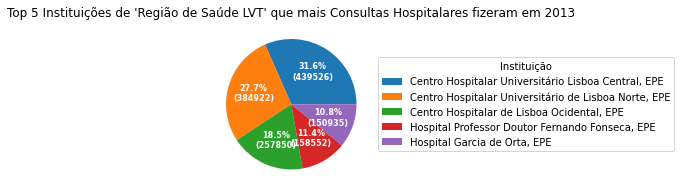

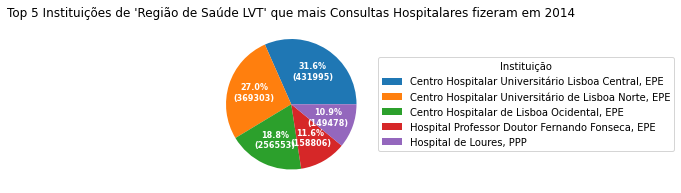

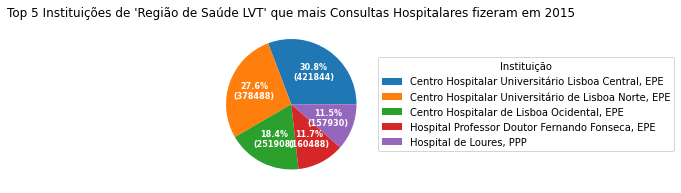

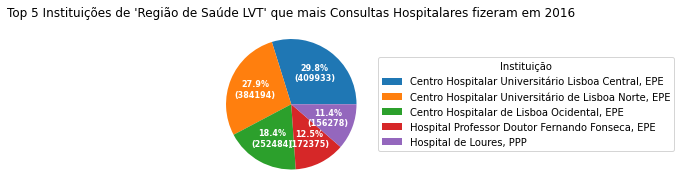

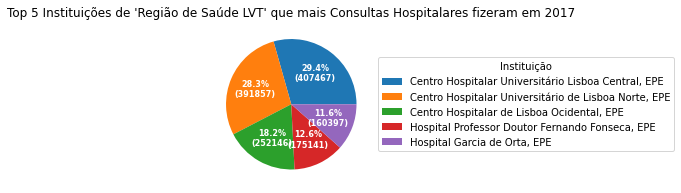

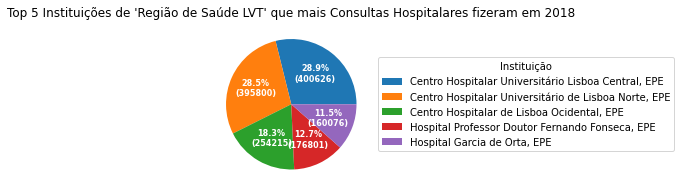

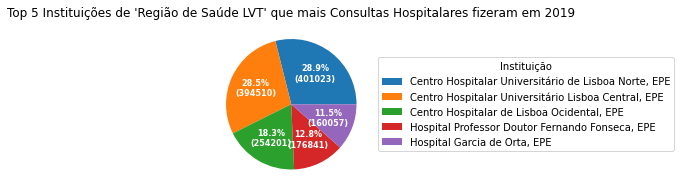

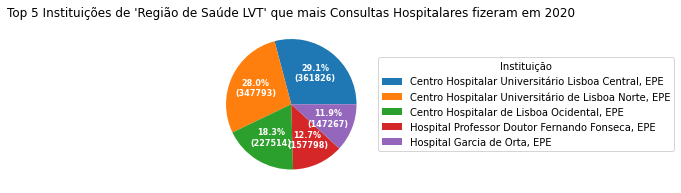

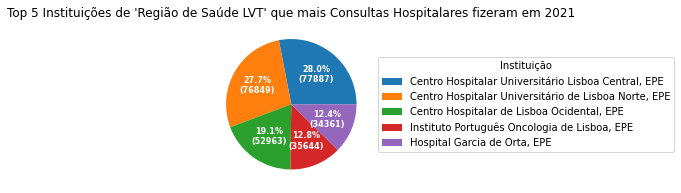

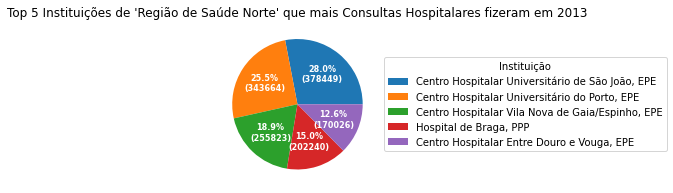

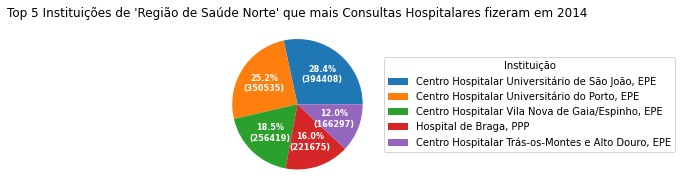

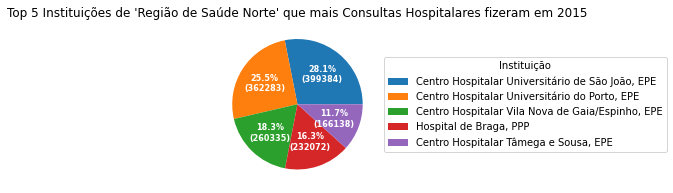

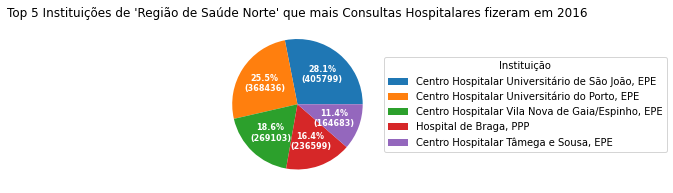

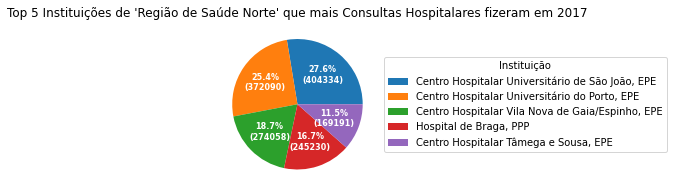

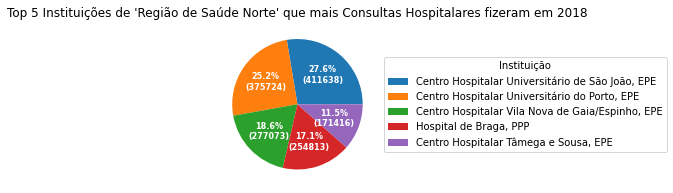

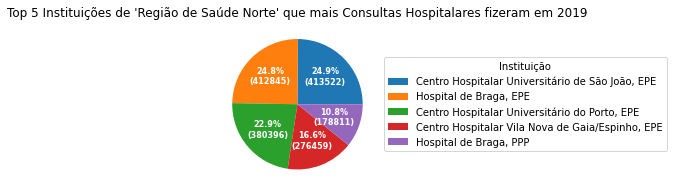

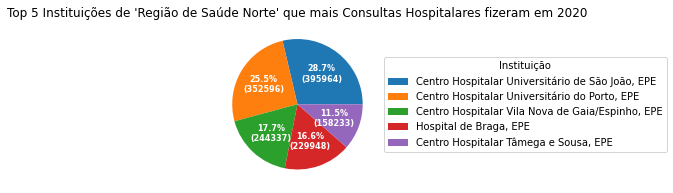

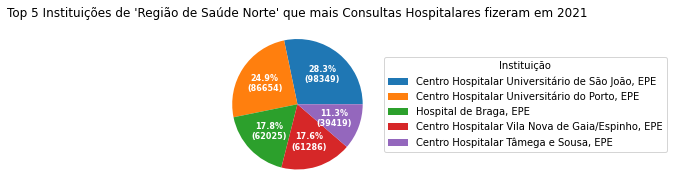

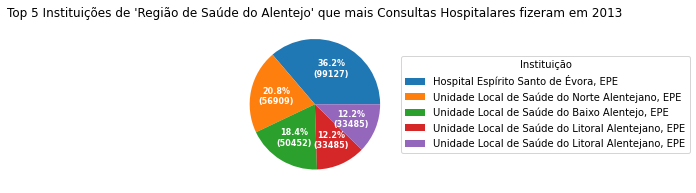

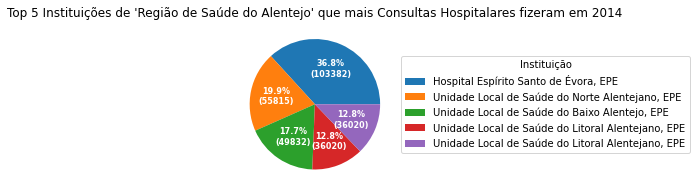

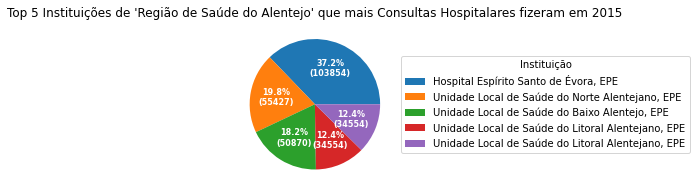

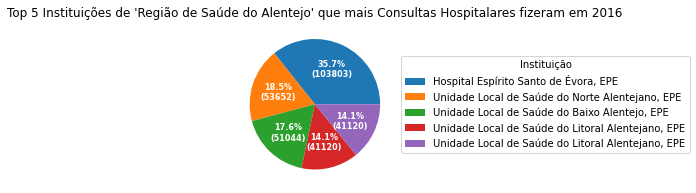

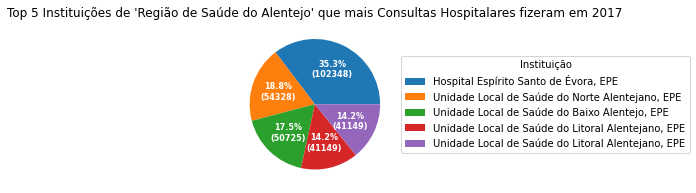

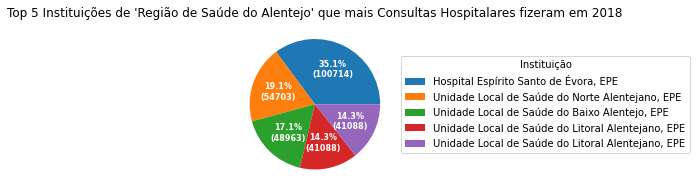

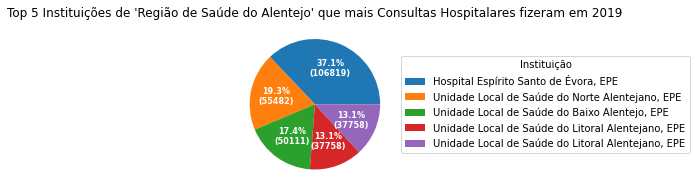

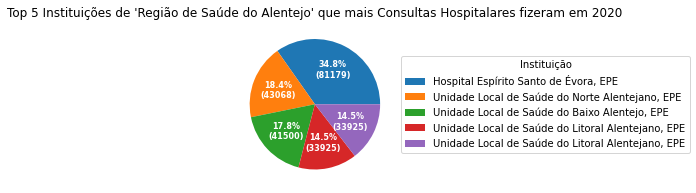

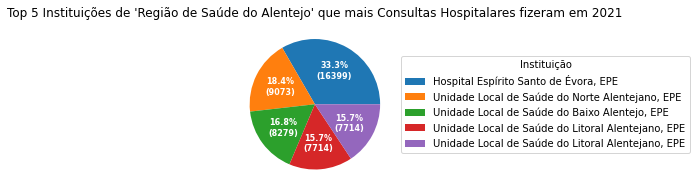

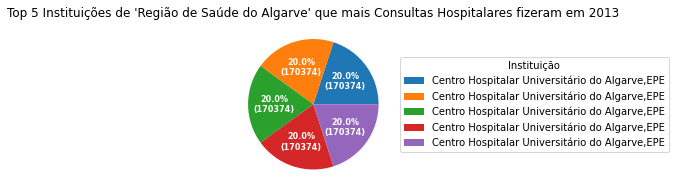

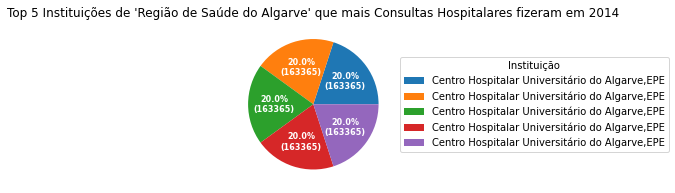

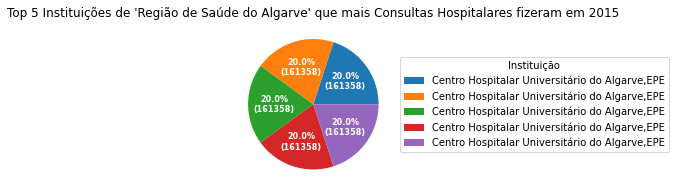

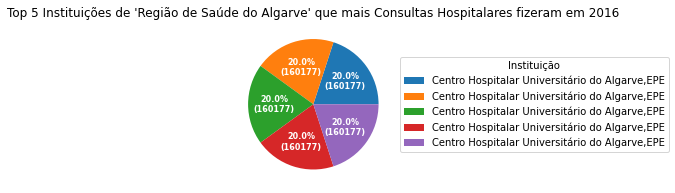

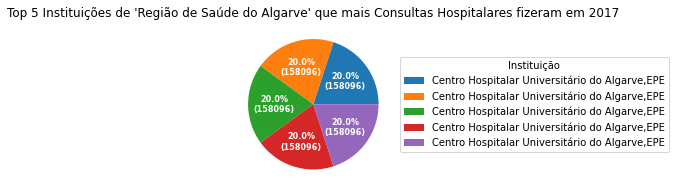

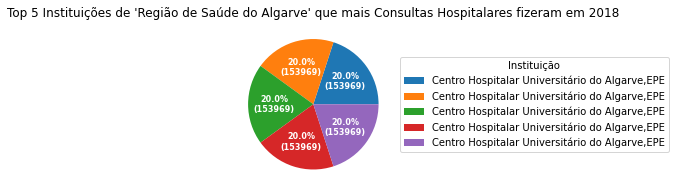

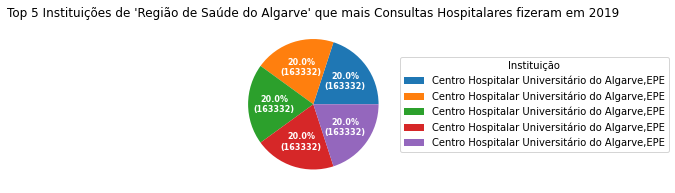

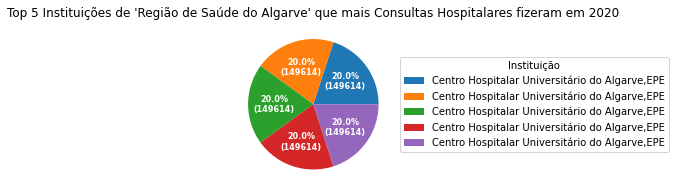

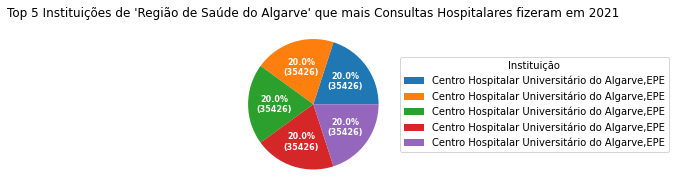

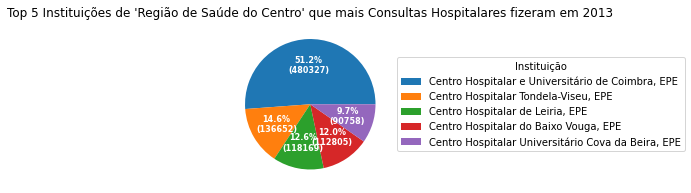

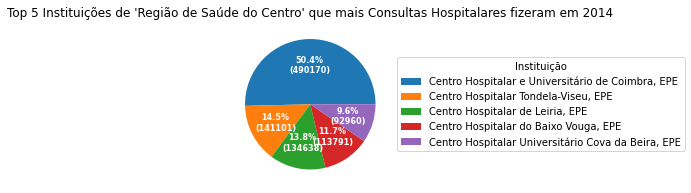

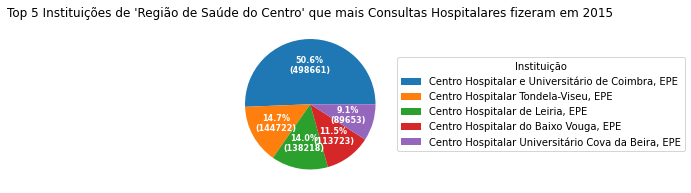

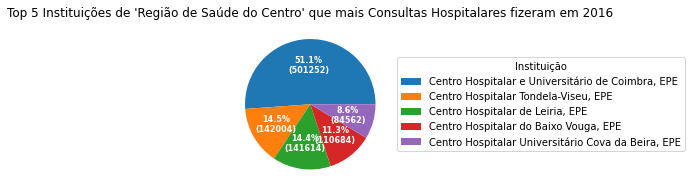

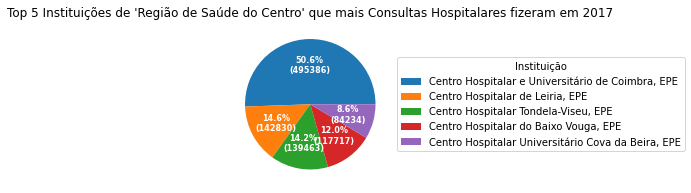

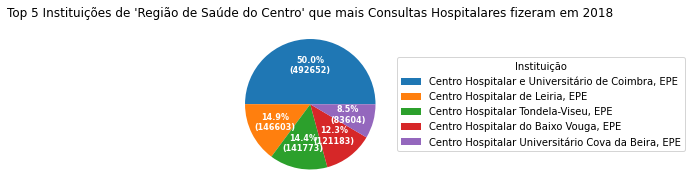

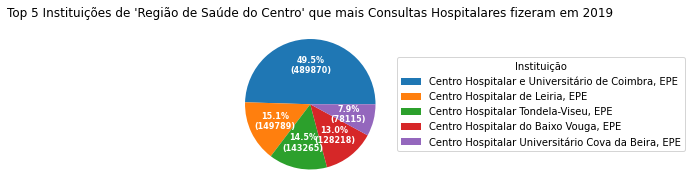

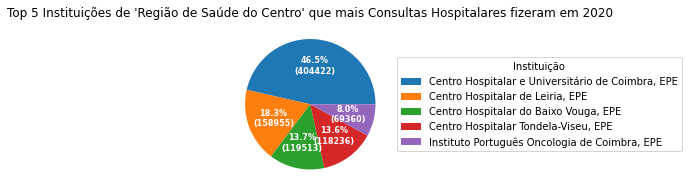

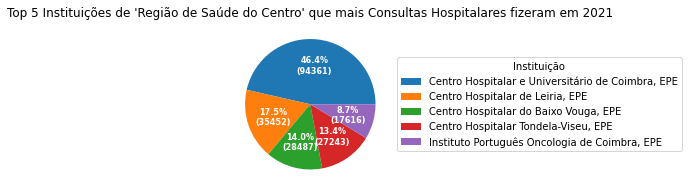

In [154]:
isBest = 1 
year_arr = topBestAppointments['Ano'].unique()
region_arr = topBestAppointments['Região'].unique()

for reg in region_arr:
    for year in year_arr:
        data = topBestAppointments.loc[(topBestAppointments['Ano'] == year) & (topBestAppointments['Região'] == reg)]
        plotPiePerRegionAndYear(reg, year, data, 1)

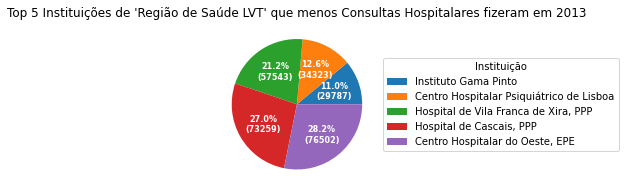

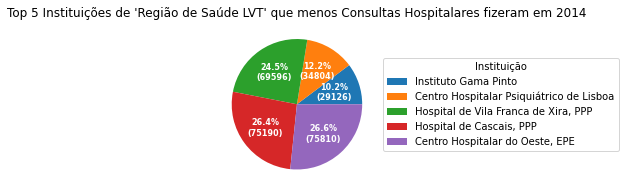

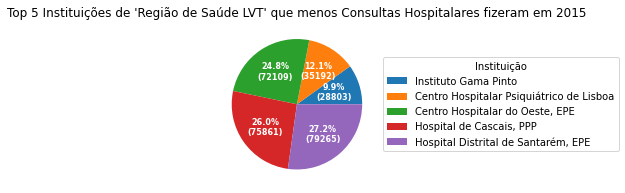

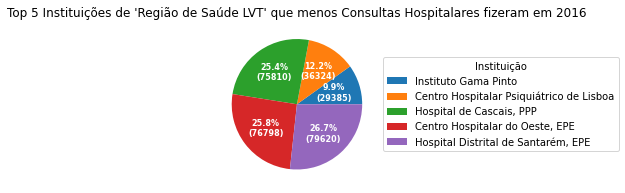

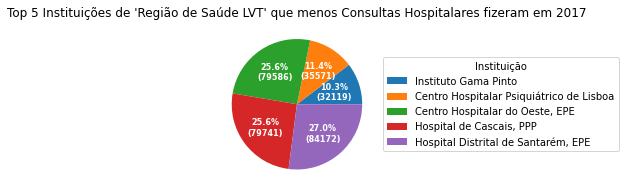

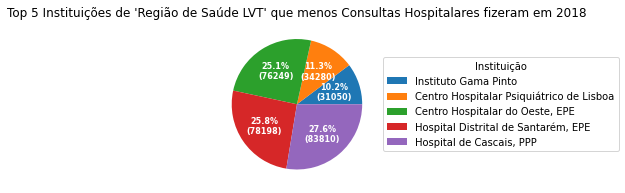

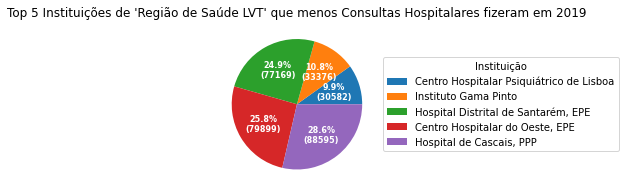

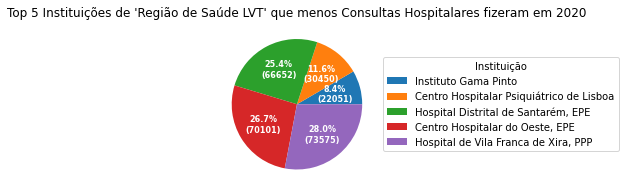

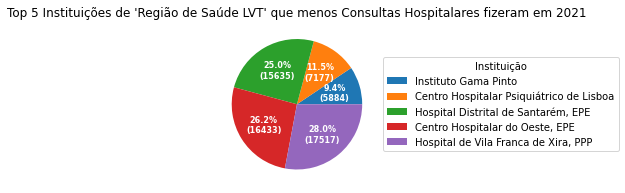

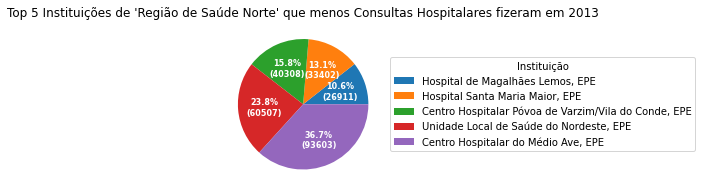

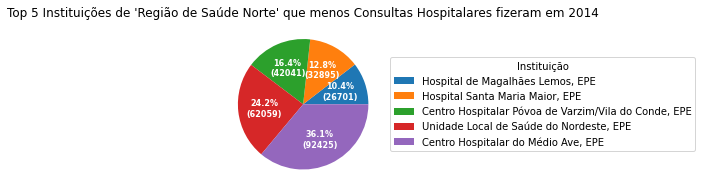

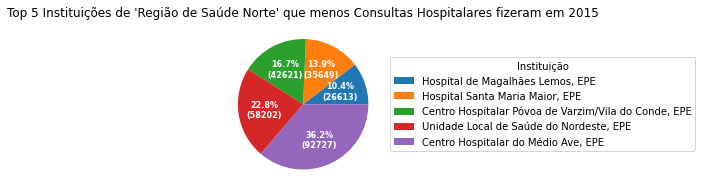

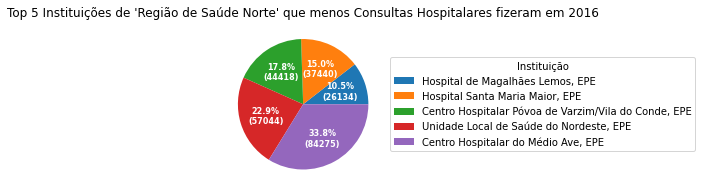

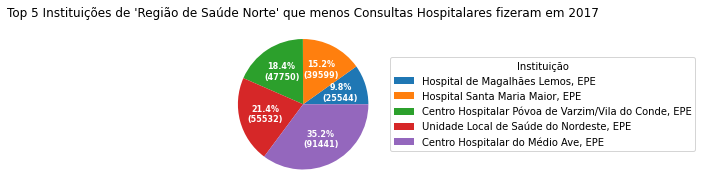

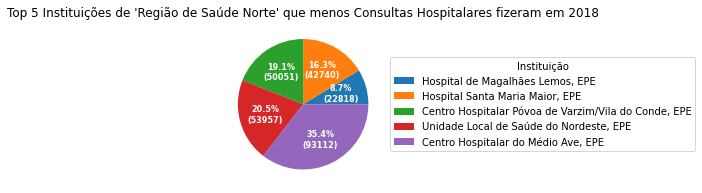

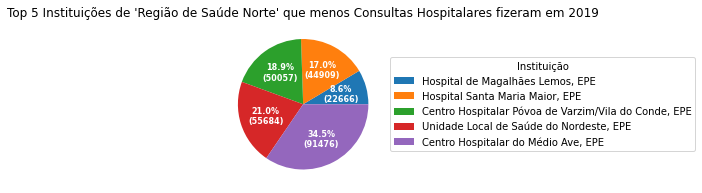

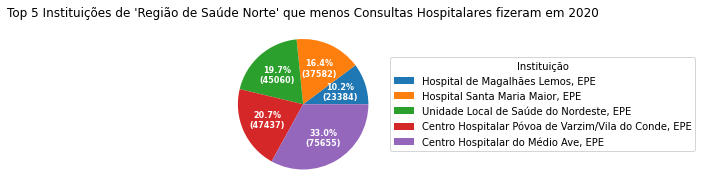

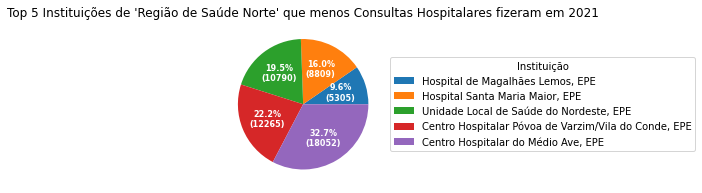

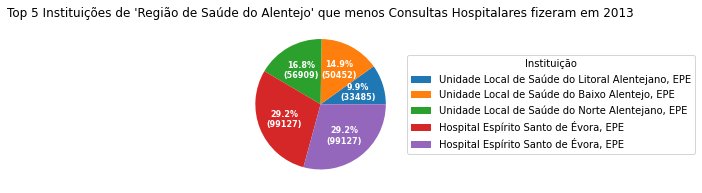

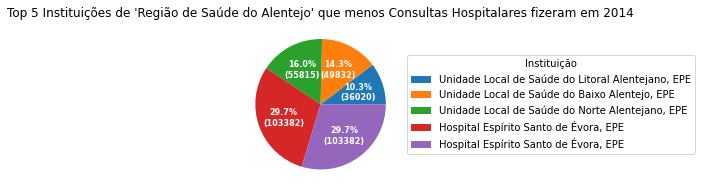

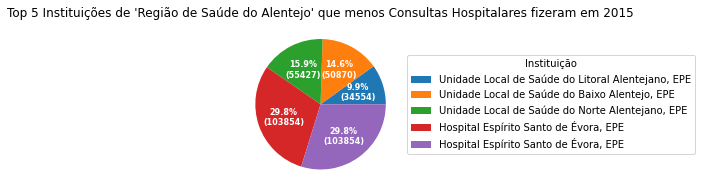

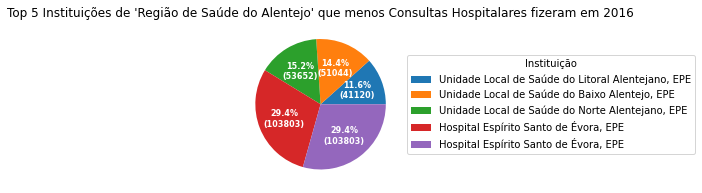

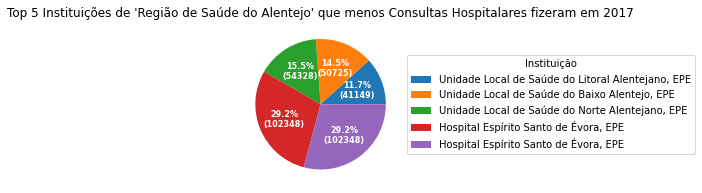

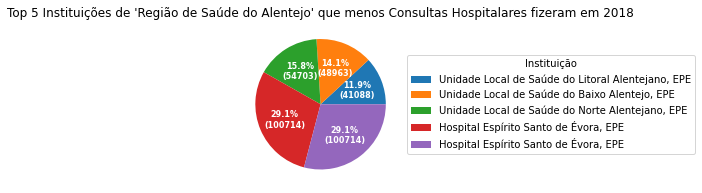

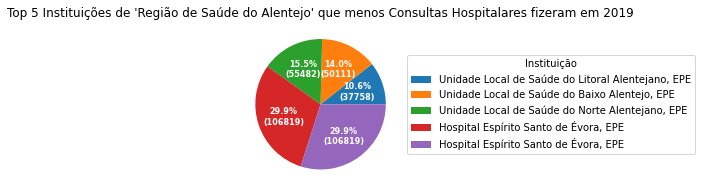

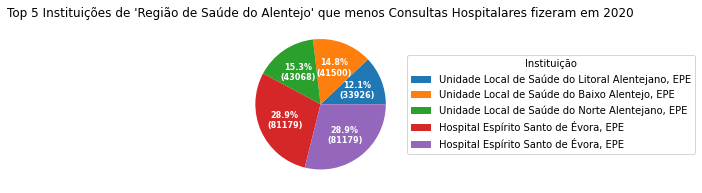

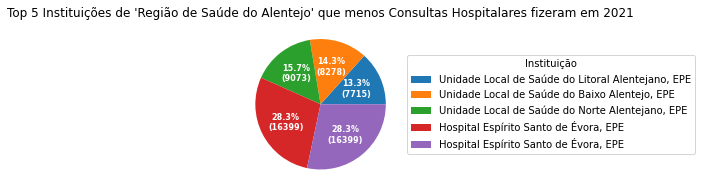

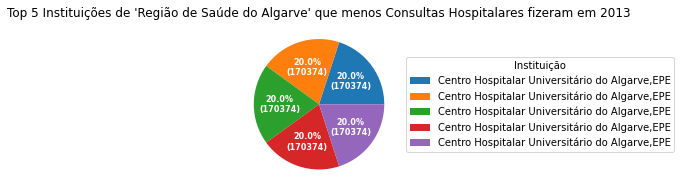

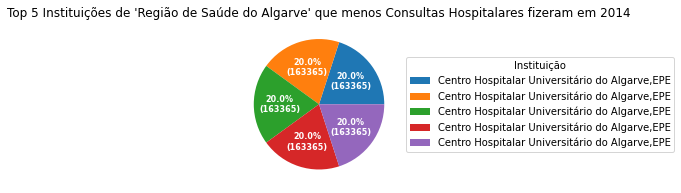

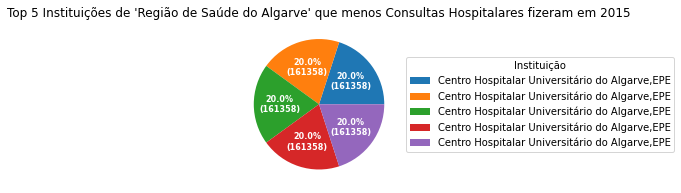

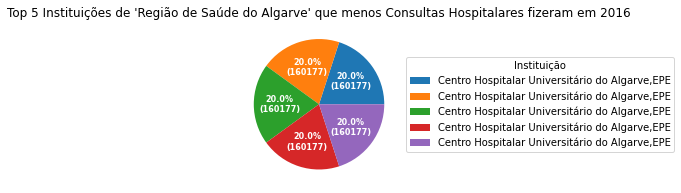

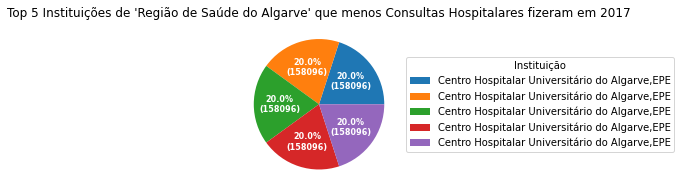

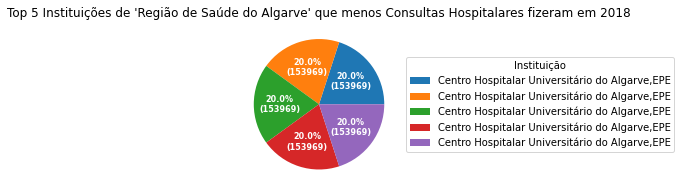

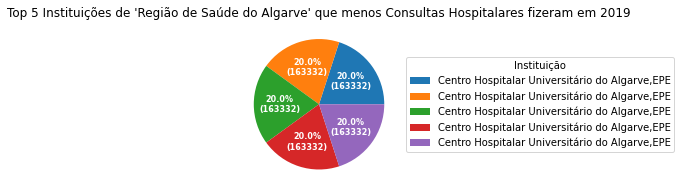

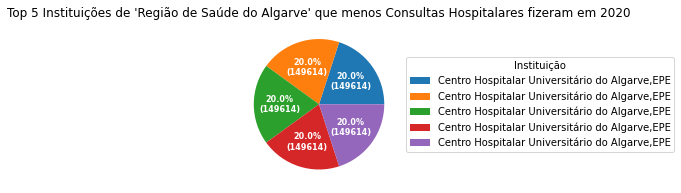

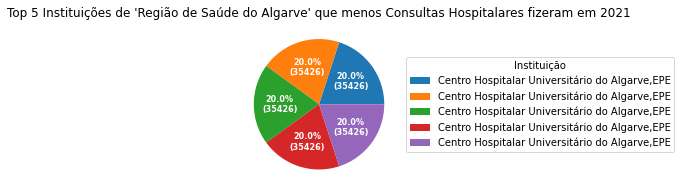

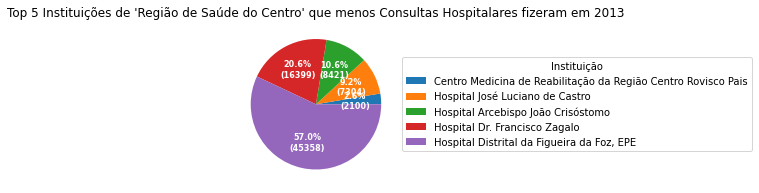

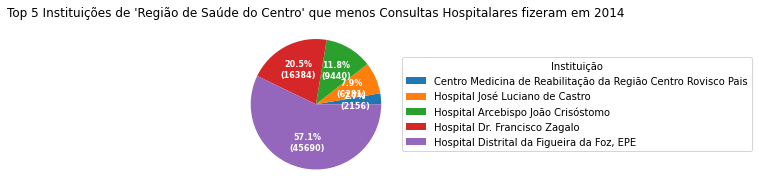

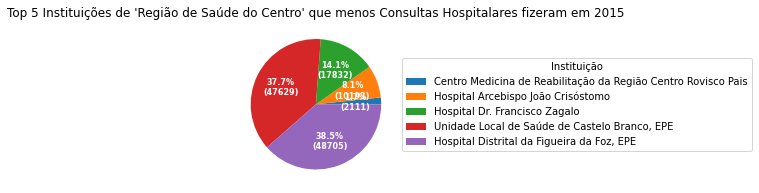

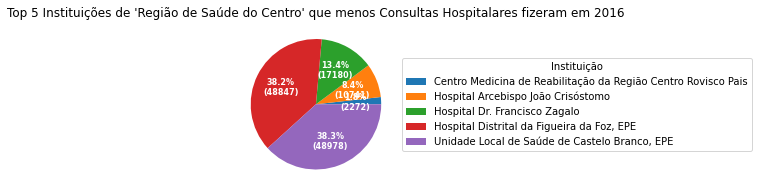

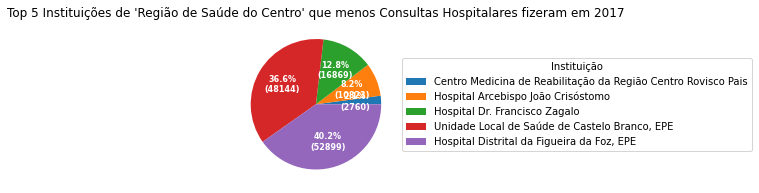

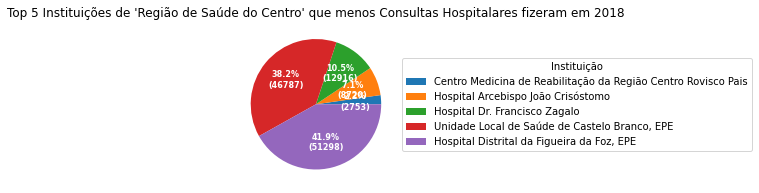

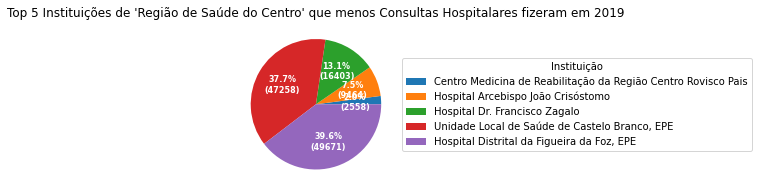

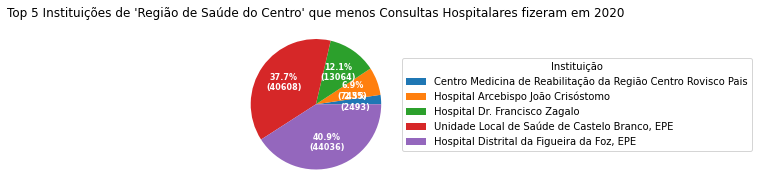

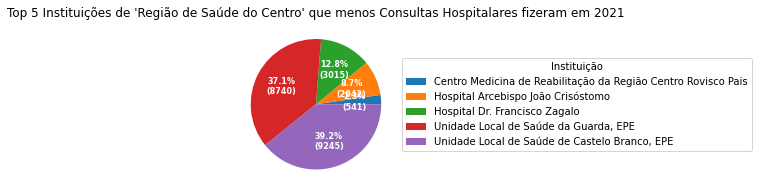

In [155]:
isBest = 0

year_arr = topWorstAppointments['Ano'].unique()
region_arr = topWorstAppointments['Região'].unique()

for reg in region_arr:
    for year in year_arr:
        data = topWorstAppointments.loc[(topWorstAppointments['Ano'] == year) & (topWorstAppointments['Região'] == reg)]
        plotPiePerRegionAndYear(reg, year, data, isBest)

# Dataset Covid

In [156]:
df_covid['Ano'] = df_covid.index.year

In [157]:
for col in df_covid.columns:
    if 'ars' in col:
        print(f"'{col}',")

'confirmados_arsnorte',
'confirmados_arscentro',
'confirmados_arslvt',
'confirmados_arsalentejo',
'confirmados_arsalgarve',
'obitos_arsnorte',
'obitos_arscentro',
'obitos_arslvt',
'obitos_arsalentejo',
'obitos_arsalgarve',
'recuperados_arsnorte',
'recuperados_arscentro',
'recuperados_arslvt',
'recuperados_arsalentejo',
'recuperados_arsalgarve',


In [173]:
confirmed_by_region_columns = ['confirmados_arsnorte',
'confirmados_arscentro',
'confirmados_arslvt',
'confirmados_arsalentejo',
'confirmados_arsalgarve'
,'Ano']

In [174]:
df_covid_daily = df_covid.diff()

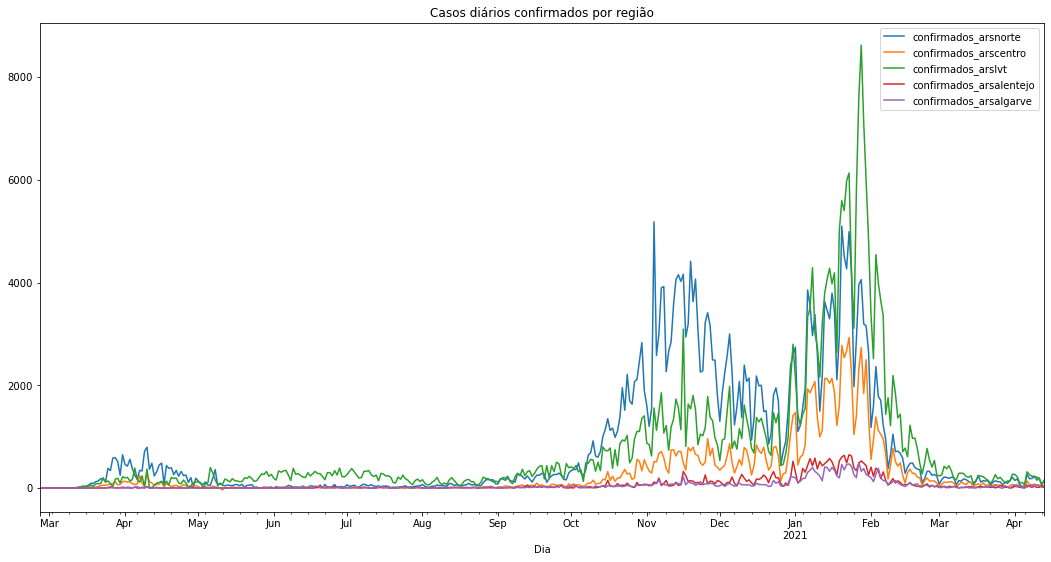

In [187]:
df_covid_daily['Ano'] = df_covid.index.year
ax = df_covid_daily[confirmed_by_region_columns[:-1]].plot(title = 'Casos diários confirmados por região', figsize=(6*3, 3*3));

In [177]:
df_covid_daily[confirmed_by_region_columns]

confirmados_arsnorte  confirmados_arscentro  confirmados_arslvt  \
Dia                                                                           
2020-02-26                   NaN                    NaN                 NaN   
2020-02-27                   0.0                    0.0                 0.0   
2020-02-28                   0.0                    0.0                 0.0   
2020-02-29                   0.0                    0.0                 0.0   
2020-03-01                   0.0                    0.0                 0.0   
...                          ...                    ...                 ...   
2021-04-09                 220.0                   69.0               234.0   
2021-04-10                 216.0                   64.0               153.0   
2021-04-11                 183.0                   62.0               200.0   
2021-04-12                  70.0                   18.0                60.0   
2021-04-13                 153.0                   48.0               137.0   

            confirmados_arsalentejo  confirmados_arsalgarve   Ano  
Dia                                                                
2020-02-26                      NaN                     NaN  2020  
2020-02-27                      0.0                     0.0  2020  
2020-02-28                      0.0                     0.0  2020  
2020-02-29                      0.0                     0.0  2020  
2020-03-01                      0.0                     0.0  2020  
...                             ...                     ...   ...  
2021-04-09                     37.0                    73.0  2021  
2021-04-10                     16.0                    59.0  2021  
2021-04-11                     16.0                    33.0  2021  
2021-04-12                     52.0                    21.0  2021  
2021-04-13                     24.0                    13.0  2021  

[413 rows x 6 columns]

<AxesSubplot:title={'center':'Casos confirmados por região'}, xlabel='Ano'>

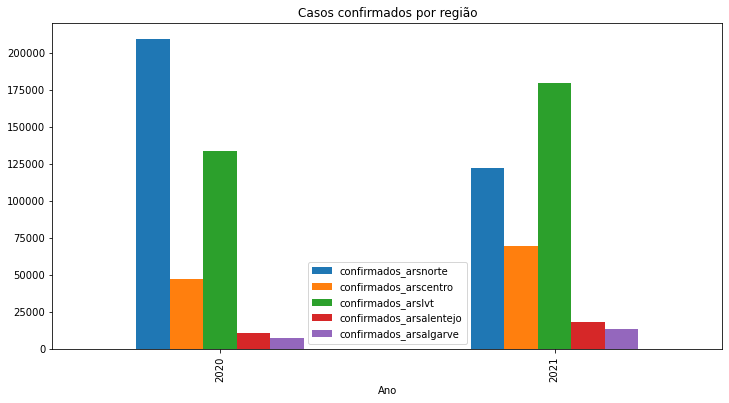

In [189]:
df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().plot(kind='bar', title = 'Casos confirmados por região',  figsize=(6*2, 3*2))

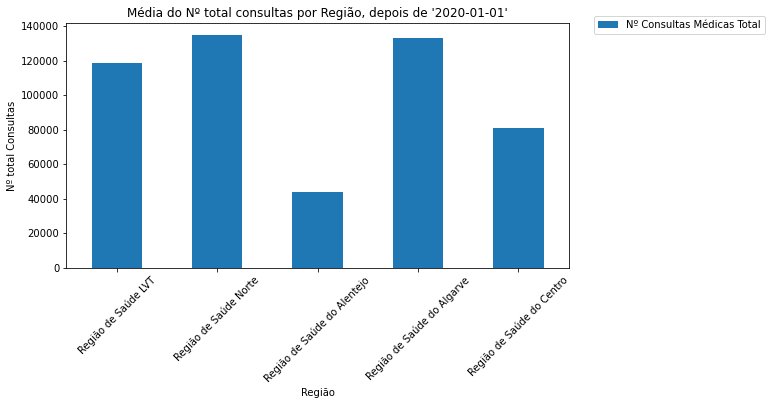

In [223]:
xlabels = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().index
ax = df_hosp_new_index.loc[df_hosp_new_index.index >= covid_start_date, ['Região', 'Nº Consultas Médicas Total']].groupby('Região').mean().plot(kind='bar', figsize=(6*1.5,3*1.5));
ax.set_xticklabels(xlabels, rotation=45);
ax.legend(bbox_to_anchor=(1.4, 1.05))
ax.set_ylabel('Nº total Consultas');
ax.set_title("Média do Nº total consultas por Região, depois de '{}'".format(covid_start_date));

In [239]:
numer = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2020]['confirmados_arsalgarve']
denom = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2020]['confirmados_arsnorte']
numer, denom, 100*numer/denom

(7698.0, 209964.0, 3.666342801623135)

In [240]:
numer = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2021]['confirmados_arsalgarve']
denom = df_covid_daily[confirmed_by_region_columns].groupby('Ano').sum().loc[2021]['confirmados_arsnorte']
numer, denom, 100*numer/denom

(13482.0, 122671.0, 10.990372622706262)

Possível Conclusão:
* "A região de saúde do Algarve (1 instituição) faz tantas consultas médicas hospitalares como a região do Norte (18 instit.) e:
   * em 2020, tem 3.66 % dos casos confirmados da Região Norte"
   * em 2021, tem 10.99 % dos casos confirmados da Região Norte"
   
  -MAS talvez tenham juntado todos os centros de saude e hospitais do algrave numa só instiuição...

In [222]:
#topBestAppointments.query("Ano > 2019 and Região in ('Região de Saúde Norte', 'Região de Saúde do Algarve')")

In [221]:
#topBestAppointments.dtypes

In [220]:
#topBestAppointments = topBestAppointments.astype({'Nº Consultas Médicas Total' : float})

In [219]:
# aqui estão apenas os dados das instituições que mais consultas fazem, de cada região (n são os dados totais )
#ax = topBestAppointments.query("Ano > 2019 and Região in ('Região de Saúde Norte', 'Região de Saúde do Algarve')").groupby(['Ano', 'Região']).mean().plot(kind='bar')